The code for this problem statement is divided into the following sections:

1. Data Reading
2. Exploratory Data Analysis (EDA)
3. Data Preparation
4. Graphical Insights
5. Model Preparation
6. Evaluating all models
7. Optimizing best 2 models
8. Performing Hypothesis Testing on performance for best 2 models
9. Interpreting final model using SHAP
10. Predicting attrition for specific employees as given in the problem statement

# Data Reading

We will first be importing the necessary libraries and reading the test and train datasets

In [115]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Mounting colab with google drive to access the csv from there
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# Reading the file

train = pd.read_csv("/content/drive/MyDrive/train_MpHjUjU.csv")

In [118]:
# Reading the file

test = pd.read_csv("/content/drive/MyDrive/test_hXY9mYw.csv")

In [119]:
# Reading head - train dataset

train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [120]:
# Reading head - test dataset

test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


# Exploratory Data Analysis (EDA)

In [121]:
# Checking datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [122]:
# Checking number of rows and columns 

train.shape

(19104, 13)

In [123]:
# Checking null values

train.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [124]:
# Analyzing statistics on features

train.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a907ebbd0>,
      dtype=object)

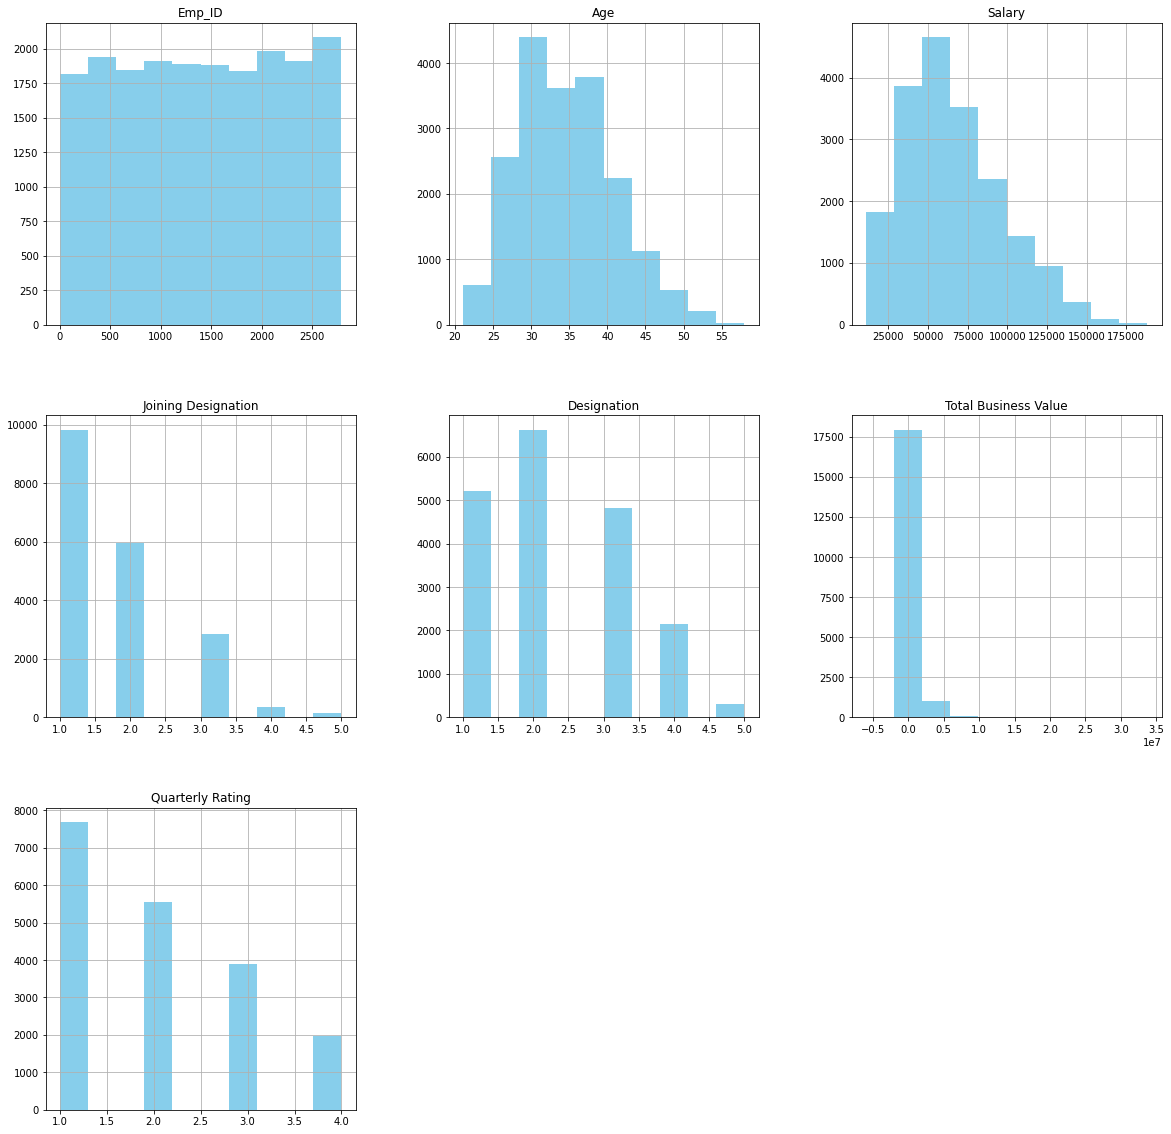

In [125]:
# Checking distribution of all features

train.hist(figsize=(20,20), color = 'skyblue')

# Data Preparation

In [126]:
# Creating copy of train dataset

train_copy = train.copy()


In [127]:
# Renaming column names - train dataset

train.rename(columns={'Joining Designation': 'Joining_Designation', 'Total Business Value': 'Total_Business_Value', 'Quarterly Rating': 'Quarterly_Rating'}, inplace=True)

In [128]:
# Renaming column names - test dataset

test.rename(columns={'Joining Designation': 'Joining_Designation', 'Total Business Value': 'Total_Business_Value', 'Quarterly Rating': 'Quarterly_Rating'}, inplace=True)

In [129]:
# Converting date columns to datetime dataype

train['MMM-YY'] = pd.to_datetime(train['MMM-YY'])
train['Dateofjoining'] = pd.to_datetime(train['Dateofjoining'])
train['LastWorkingDate'] = pd.to_datetime(train['LastWorkingDate'])

In [130]:
# Getting total business value for each employee

overall_value_generated = train.groupby('Emp_ID').Total_Business_Value.sum()
overall_value_generated_df = overall_value_generated.to_frame().reset_index()
overall_value_generated_df = overall_value_generated_df.sort_values(by=["Emp_ID"])
overall_value_generated_df = overall_value_generated_df.reset_index(drop=True)
overall_value_generated_df.columns= ['Emp_ID', 'Overall_Business_Value_per_employee']


In [131]:
overall_value_generated_df.head()

,Emp_ID,Overall_Business_Value_per_employee
0,1,1715580
1,2,0
2,4,350000
3,5,120360
4,6,1265000


In [132]:
# Getting total month count where business value generated was 0 or less than 0

train['Total_months_of_negative_value_generated'] = train['Total_Business_Value'].apply(lambda x: True if (x < 0 or x == 0) else False)
value = train.groupby('Emp_ID').Total_months_of_negative_value_generated.sum()
negative_business_value_months_df = value.to_frame().reset_index()
negative_business_value_months_df = negative_business_value_months_df.sort_values(by=["Emp_ID"])
negative_business_value_months_df = negative_business_value_months_df.reset_index(drop=True)
train.drop(['Total_months_of_negative_value_generated'], axis=1, inplace=True)


In [133]:
negative_business_value_months_df.head()

,Emp_ID,Total_months_of_negative_value_generated
0,1,2
1,2,2
2,4,4
3,5,2
4,6,4


In [134]:
# Getting count of total months served in the company

total_months_served = train.groupby('Emp_ID').size()
total_months_served_df = total_months_served.to_frame().reset_index()
total_months_served_df = total_months_served_df.sort_values(by=["Emp_ID"])
total_months_served_df = total_months_served_df.reset_index(drop=True)
total_months_served_df.columns= ['Emp_ID', 'Total_Months_Served']


In [135]:
total_months_served_df.head(10)

,Emp_ID,Total_Months_Served
0,1,3
1,2,2
2,4,5
3,5,3
4,6,5
5,8,3
6,11,1
7,12,6
8,13,23
9,14,3


In [136]:
# Getting average of last 3 months value generated

last_3_months_average_value = train.groupby('Emp_ID').nth([-1,-2,-3]).Total_Business_Value.mean(axis=0,level=0)
last_3_months_average_value_df = last_3_months_average_value.to_frame().reset_index()
last_3_months_average_value_df = last_3_months_average_value_df.sort_values(by=["Emp_ID"])
last_3_months_average_value_df = last_3_months_average_value_df.reset_index(drop=True)
last_3_months_average_value_df.columns= ['Emp_ID', 'Last_3_months_average_business']


In [137]:
last_3_months_average_value_df.head(10)

,Emp_ID,Last_3_months_average_business
0,1,571860.000000
1,2,0.000000
2,4,116666.666667
3,5,40120.000000
4,6,421666.666667
5,8,0.000000
6,11,0.000000
7,12,0.000000
8,13,183333.333333
9,14,0.000000


In [138]:
# Getting average of last 3 months rating

last_3_months_average_rating = train.groupby('Emp_ID').nth([-1,-2,-3]).Quarterly_Rating.mean(axis=0,level=0)
last_3_months_average_rating_df = last_3_months_average_rating.to_frame().reset_index()
last_3_months_average_rating_df = last_3_months_average_rating_df.sort_values(by=["Emp_ID"])
last_3_months_average_rating_df = last_3_months_average_rating_df.reset_index(drop=True)
last_3_months_average_rating_df.columns= ['Emp_ID', 'Last_3_months_average_rating']


In [139]:
last_3_months_average_rating_df.head(10)

,Emp_ID,Last_3_months_average_rating
0,1,2.0
1,2,1.0
2,4,1.0
3,5,1.0
4,6,2.0
5,8,1.0
6,11,1.0
7,12,1.0
8,13,1.0
9,14,1.0


In [140]:
# Creating target column 

train['employee_resigned_status'] = train['LastWorkingDate'].apply(lambda x: 0 if x is pd.NaT else 1)

In [141]:
# Keeping last record for each employee

train = train.sort_values(by=["Emp_ID", "MMM-YY"])
train = train.drop_duplicates(subset=['Emp_ID'], keep='last').reset_index(drop=True)


In [142]:
# Getting total count of promotions for each employee

train['Total_promotion_received'] = train['Designation'] - train['Joining_Designation']

In [143]:
# Adding newly created columns to train dataset

train = pd.merge(overall_value_generated_df, train, on='Emp_ID' , how='inner')
train = pd.merge(negative_business_value_months_df, train, on='Emp_ID' , how='inner')
train = pd.merge(total_months_served_df, train, on='Emp_ID' , how='inner')
train = pd.merge(last_3_months_average_value_df, train, on='Emp_ID' , how='inner')
train = pd.merge(last_3_months_average_rating_df, train, on='Emp_ID' , how='inner')

In [144]:
train.head()

,Emp_ID,Last_3_months_average_rating,Last_3_months_average_business,Total_Months_Served,Total_months_of_negative_value_generated,Overall_Business_Value_per_employee,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining_Designation,Designation,Total_Business_Value,Quarterly_Rating,employee_resigned_status,Total_promotion_received
0,1,2.0,571860.000000,3,2,1715580,2016-03-01,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,0
1,2,1.0,0.000000,2,2,0,2017-12-01,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,0
2,4,1.0,116666.666667,5,4,350000,2017-04-01,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1,0
3,5,1.0,40120.000000,3,2,120360,2016-03-01,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1,0
4,6,2.0,421666.666667,5,4,1265000,2017-12-01,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2,0,0


In [145]:
# Creating dataframe with train Emp_ID to be used at end for appending prediction values

final_prediction = pd.DataFrame(train['Emp_ID'], columns=['Emp_ID'])


In [146]:
# Creating a copy of this finalised version of train dataset

train_finalized_copy = train.copy()

# Graphical Insights

First we will just check the distribution of Gender, Education Level and City in out dataset. We did not do this in the EDA section because there were multiple records for each employee, and this would have resulted in different duplicate values.

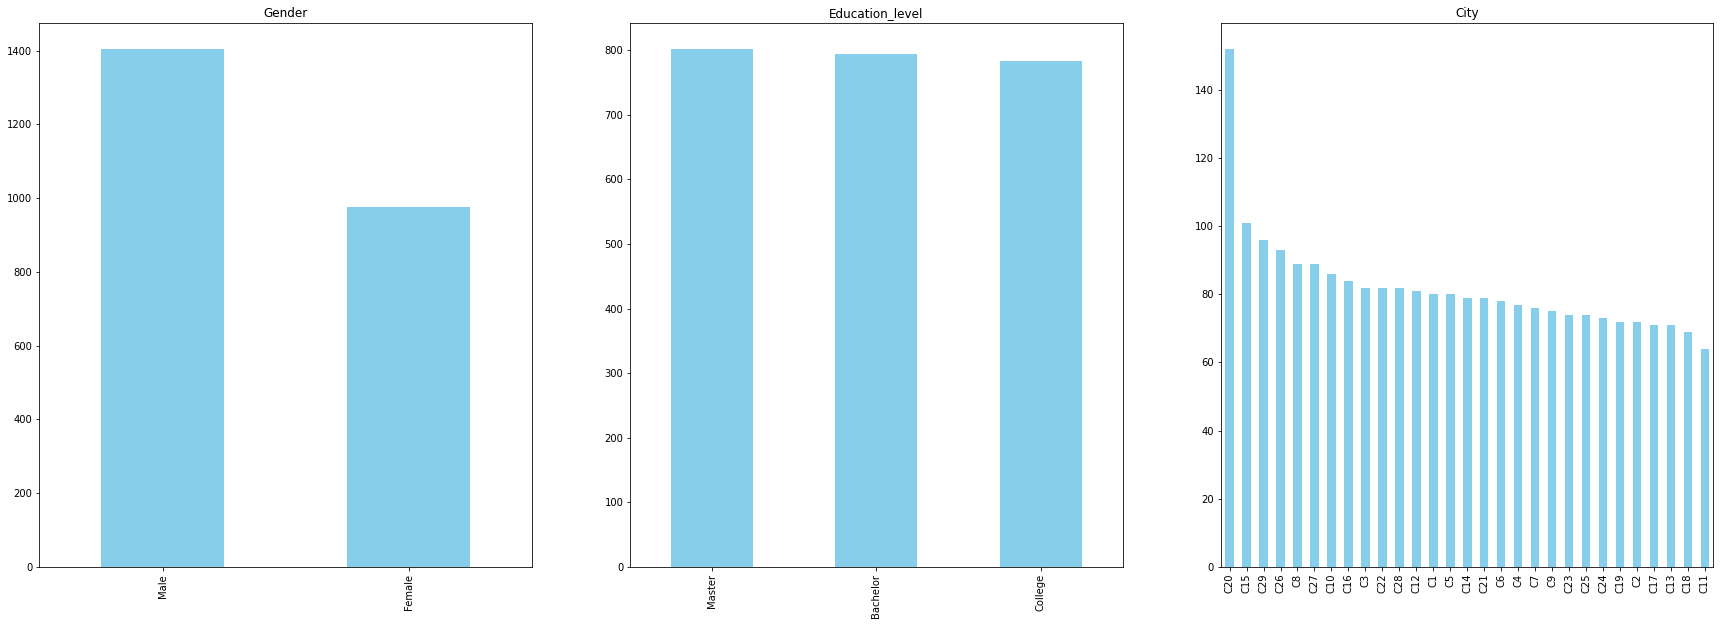

In [147]:
# Analyzing the distribution of Gender and Education Level

plt.figure(1)   
plt.subplot(131)
train['Gender'].value_counts().plot.bar(figsize=(20,10),title='Gender',color='skyblue')
plt.subplot(132)
train['Education_Level'].value_counts().plot.bar(figsize=(20,10),title='Education_level',color='skyblue')
plt.subplot(133)
train['City'].value_counts().plot.bar(figsize=(30,10),title='City',color='skyblue')
plt.show()

Based on the below visualization, the employees who have left seems to have generated less business value in the past 3 months. We need to look at this more closely.

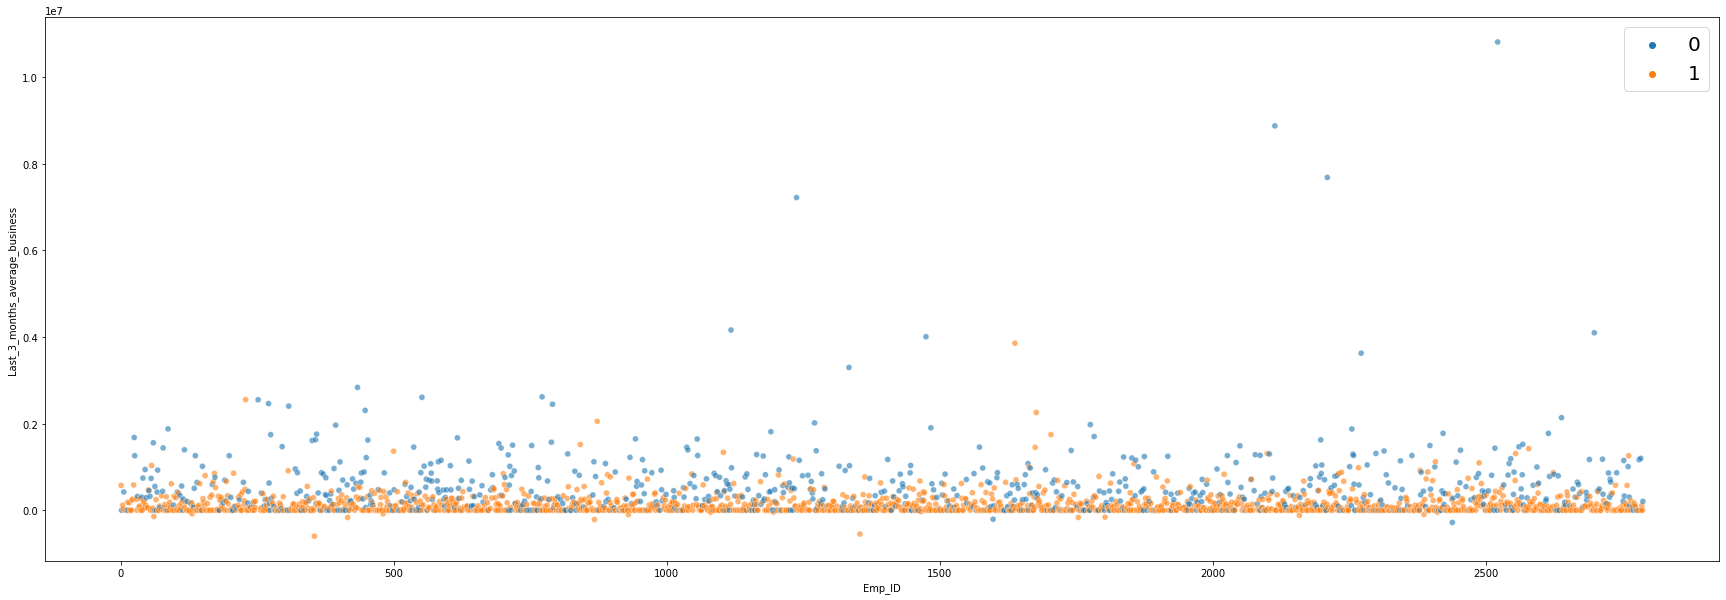

In [148]:
# Scatterplot of 'Emp_ID' and 'Last_3_months_average_business' with 'employee_resigned_status' as color
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train, x='Emp_ID', y='Last_3_months_average_business', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')

Below is the slightly zoomed in version of the above graph. Taking values less than 5000000, we can see the orange dots are spread more towards the bottom. This confirms that the employees who left the company, generated less business value in their last 3 months.

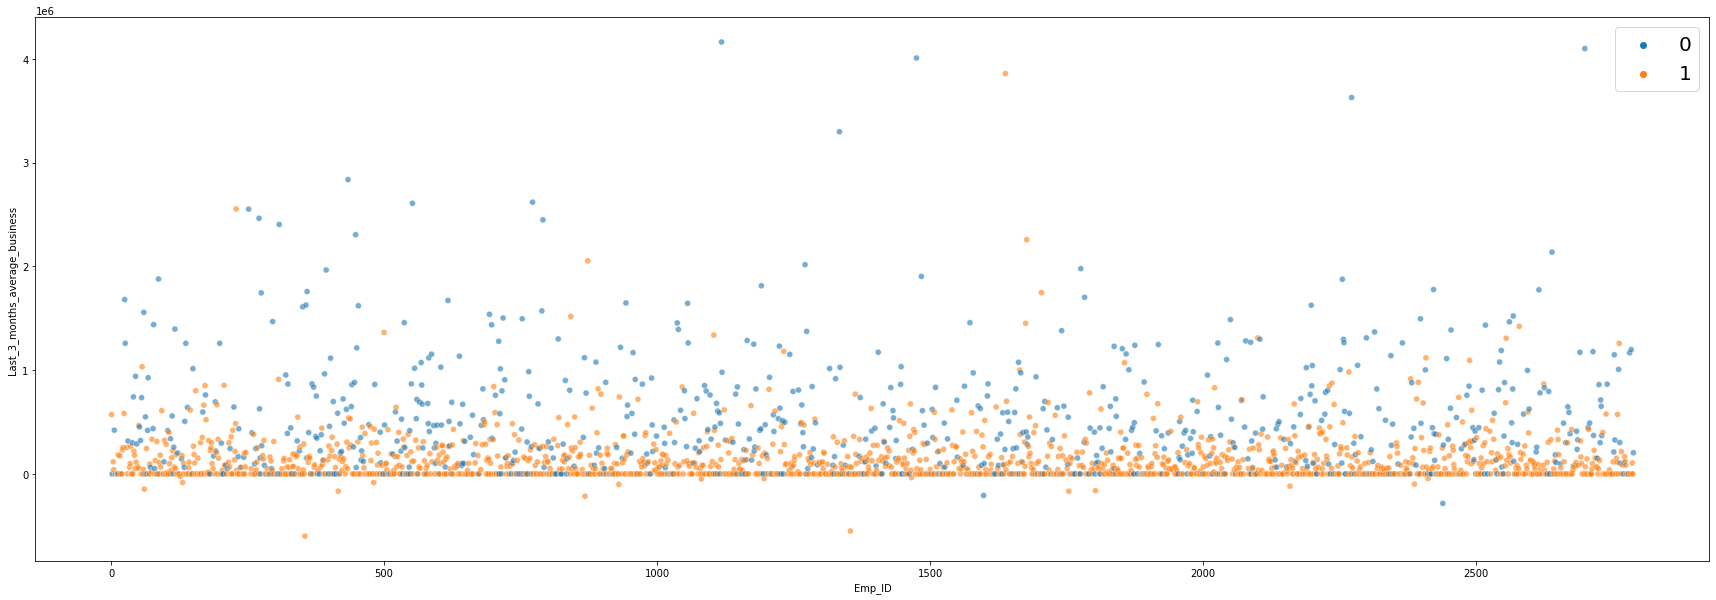

In [149]:
# Zoomed in Scatterplot of 'Emp_ID' and 'Last_3_months_average_business' with 'employee_resigned_status' left as color
# average business value < 5000000
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train[train['Last_3_months_average_business']<5000000], x='Emp_ID', y='Last_3_months_average_business', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')


Below is the scatterplot of resigned status with number of promotions received. We can see that regardless of the total promotions, employees are still leaving the company.

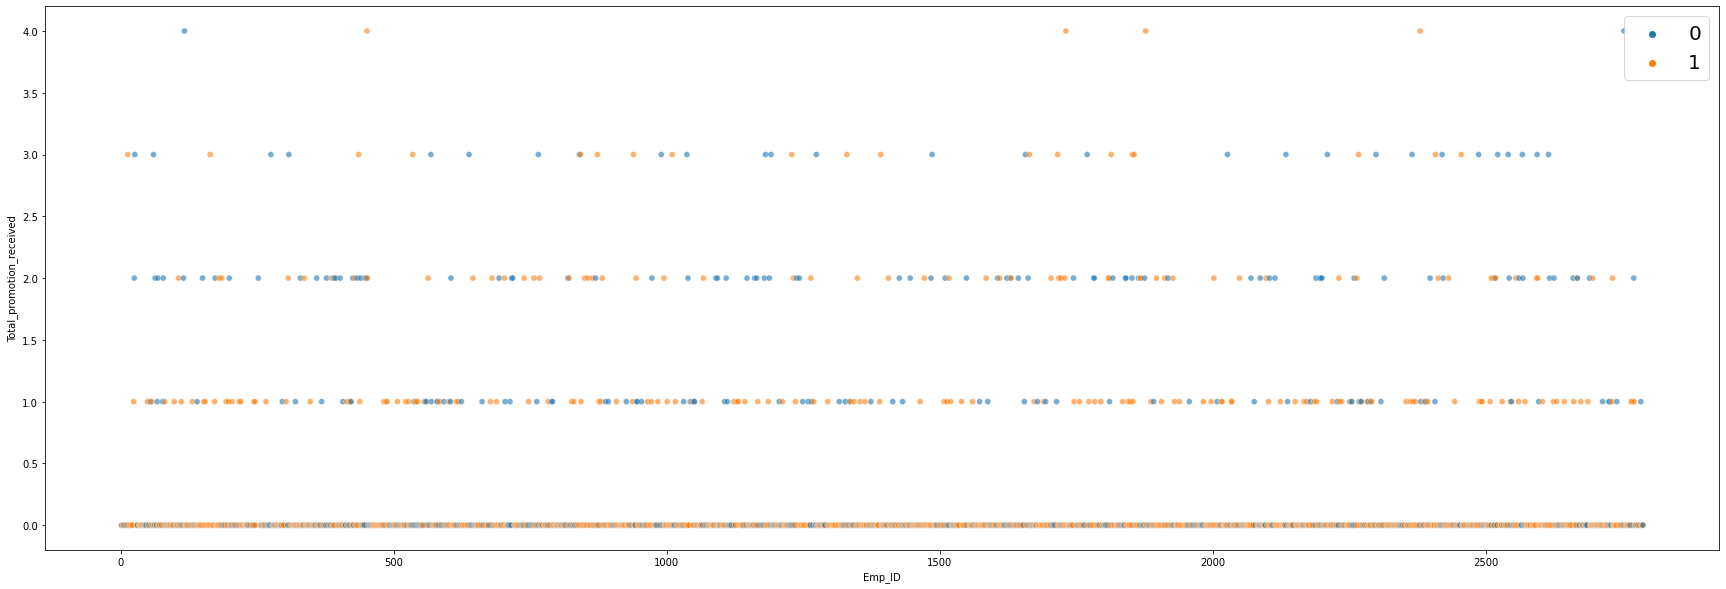

In [150]:
# Scatterplot of 'Emp_ID' and 'Total_promotion_received' with 'employee_resigned_status' left as color
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train, x='Emp_ID', y='Total_promotion_received', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')

Below is the scatterplot of resigned status with employee salary. We can see that regardless of the salary, employees are still leaving the company.

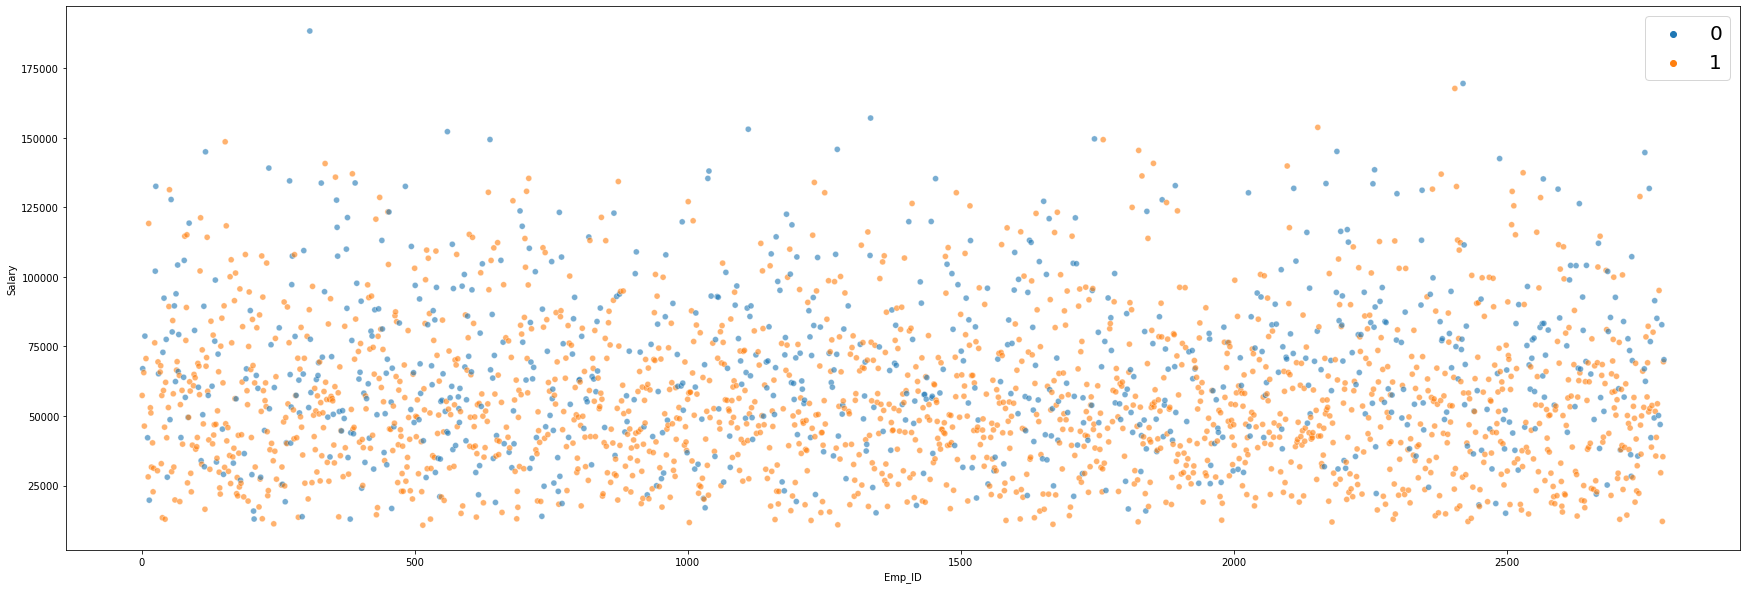

In [172]:
# Scatterplot of 'Emp_ID' and 'Salary' with 'employee_resigned_status' left as color
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train, x='Emp_ID', y='Salary', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')

Below is the scatterplot of resigned status with employee age. We can see that employees with higher age are resigning in large numbers.

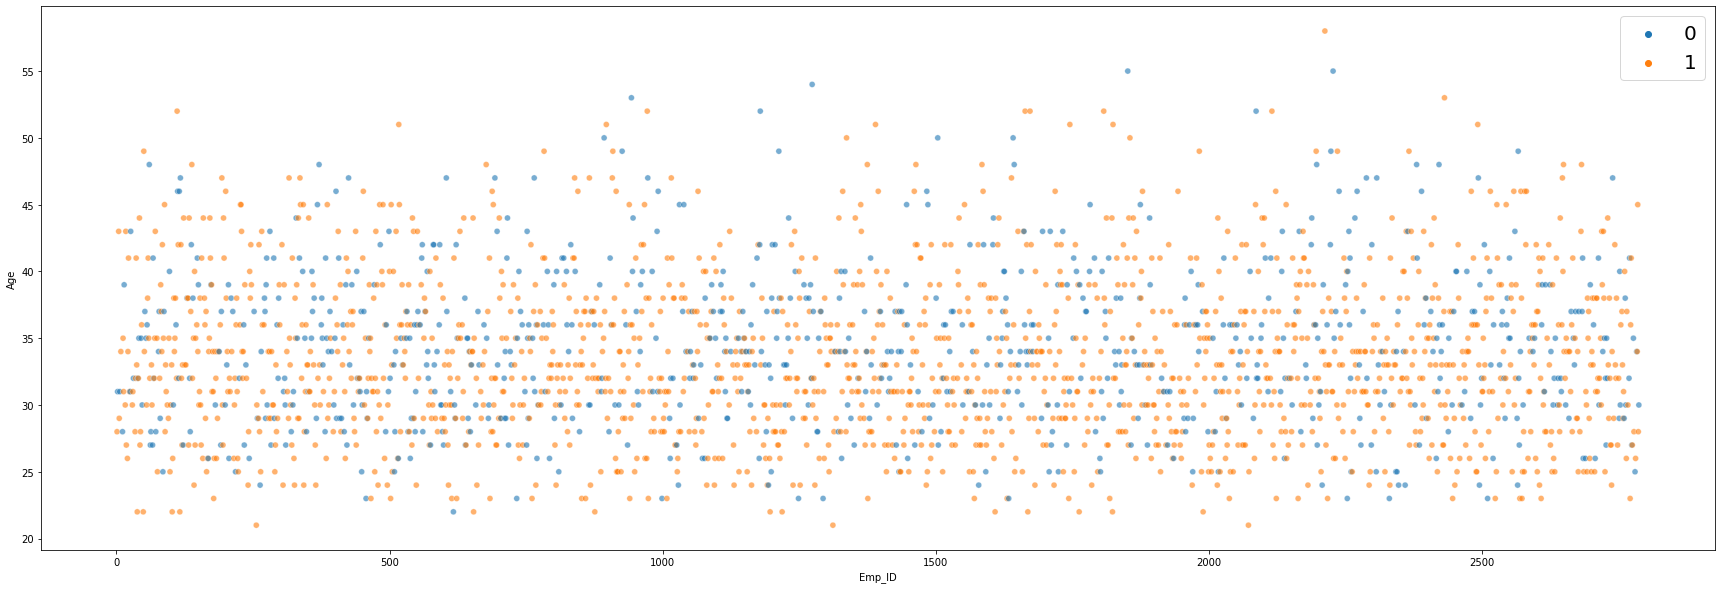

In [152]:
# Scatterplot of 'Emp_ID' and 'Age' with 'employee_resigned_status' left as color
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train, x='Emp_ID', y='Age', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')

Below is the slightly zoomed in version of the above graph. Taking age > 40, we can see the orange dots are spread more towards the top. This confirms that as the employee age increases, they are more inclined on leaving the company.

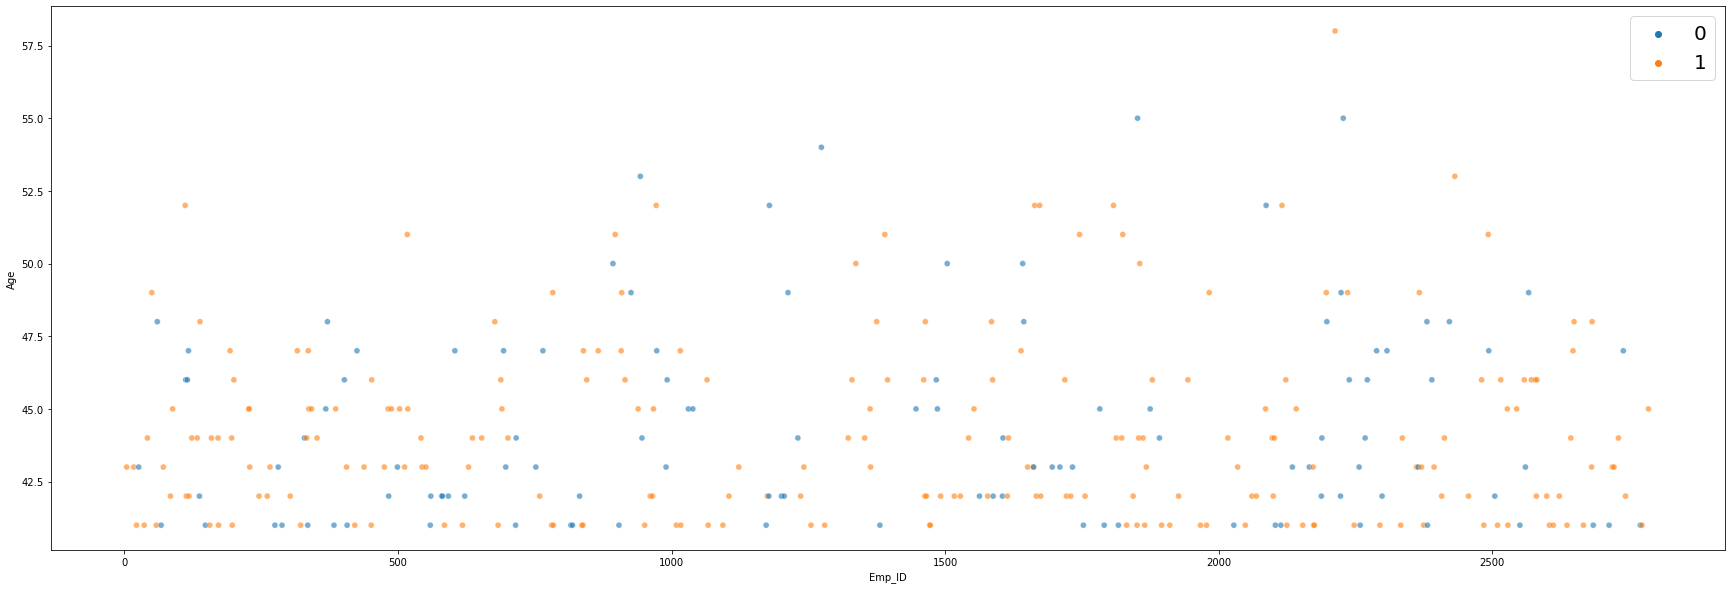

In [153]:
# # Zoomed in Scatterplot of 'Emp_ID' and 'Age' with 'employee_resigned_status' left as color
# age > 40 years
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train[train['Age']>40], x='Emp_ID', y='Age', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')

The below bar chart depicts the latest quarterly ratings for employees who left/stayed in the company. It is evident that the employees who left has received the least ratings.

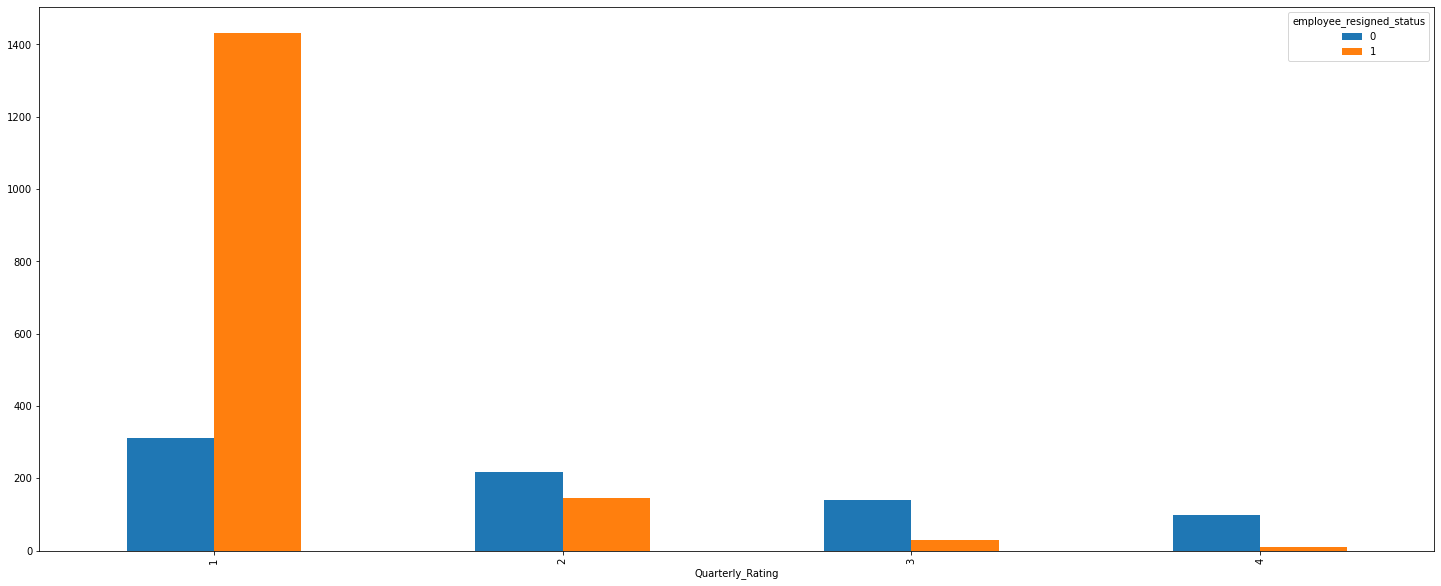

In [154]:
# Barplot showing count of employees with their latest rating and resigned status

pd.crosstab(train['Quarterly_Rating'],train['employee_resigned_status']).plot.bar(figsize=(25,10))

The below bar chart depicts the cities for employees who left/stayed in the company. It seems that employees who work in City 20 are resigning the most. This might be because there are most employees in City 20 location.

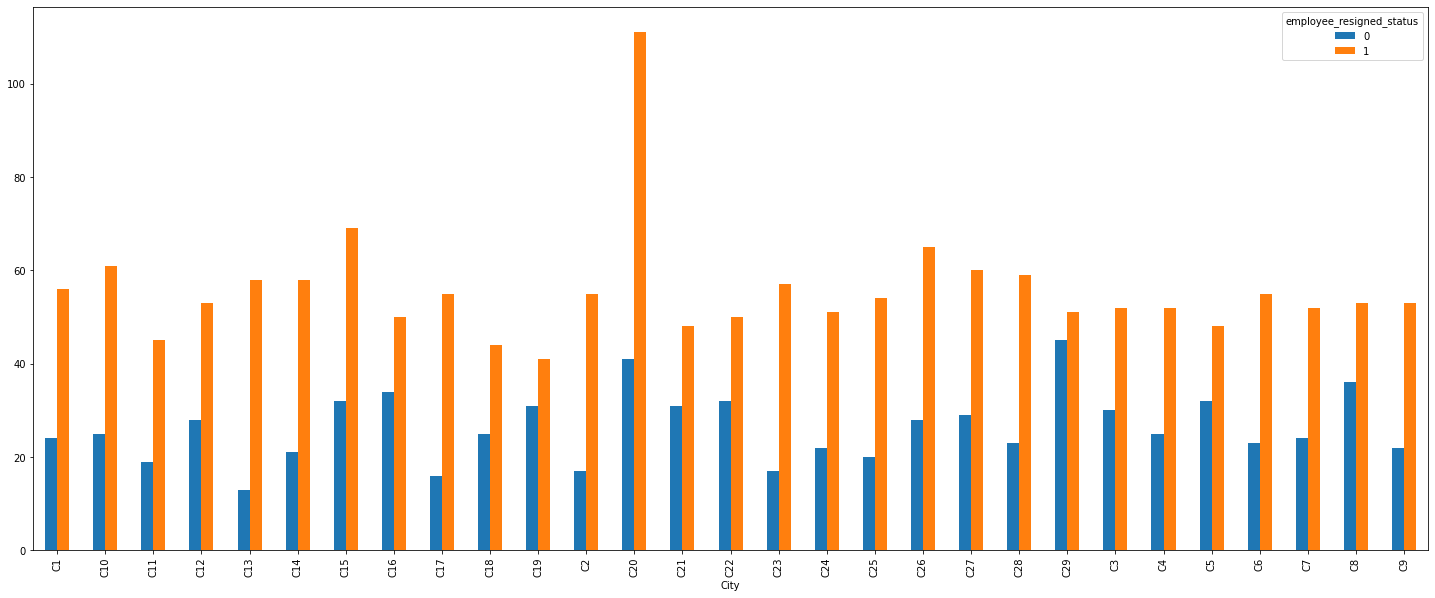

In [155]:
# Barplot showing count of employees with their cities and resigned status

pd.crosstab(train['City'],train['employee_resigned_status']).plot.bar(figsize=(25,10))

The below bar chart depicts the education levels for employees who left/stayed in the company. It looks like education does not play a role in determining if an employee leaves or not.

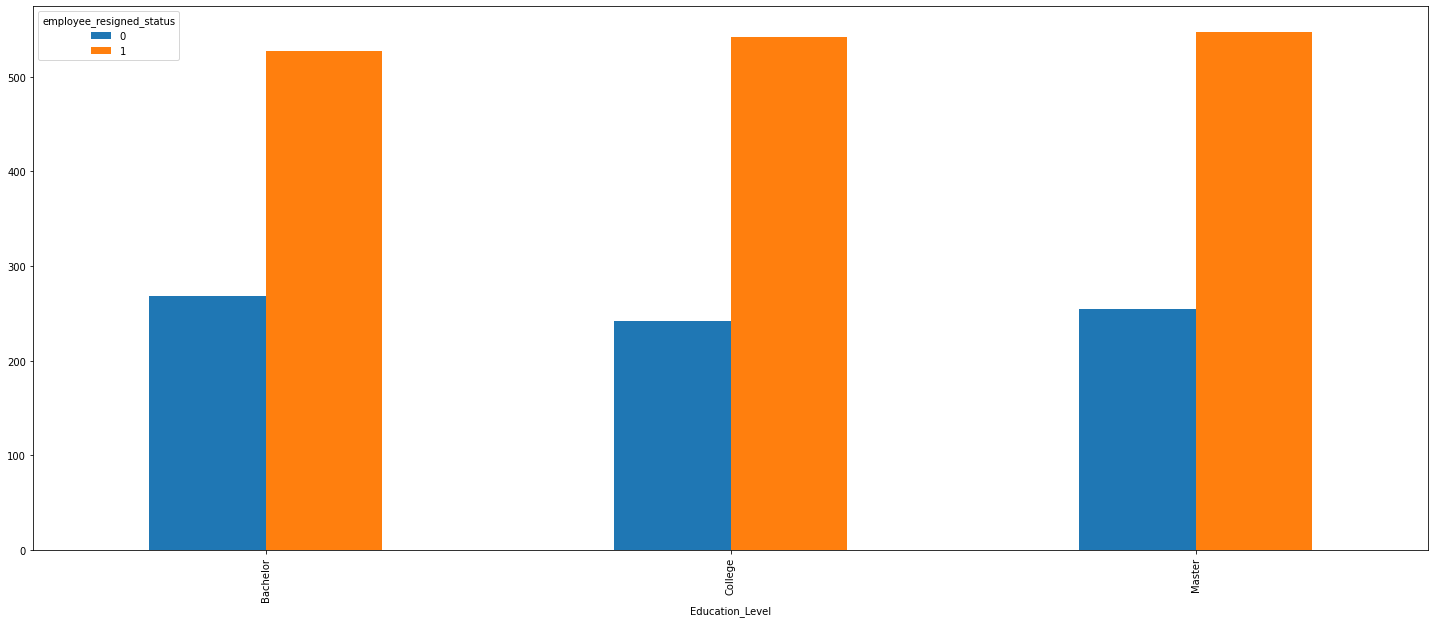

In [156]:
# Barplot showing count of employees with their Education levels and resigned status

pd.crosstab(train['Education_Level'],train['employee_resigned_status']).plot.bar(figsize=(25,10))

The below bar chart depicts the gender for employees who left/stayed in the company. It looks like more men are leaving the company as compared to women.

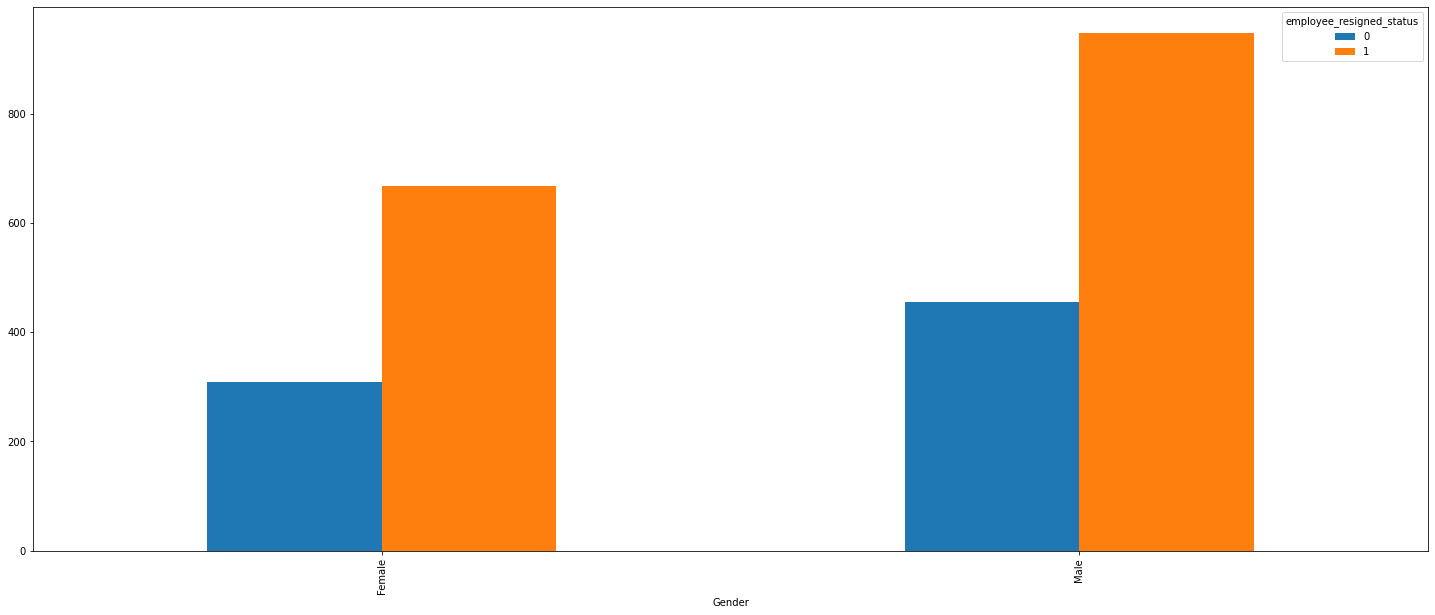

In [157]:
# Barplot showing count of employees with their Gender and resigned status

pd.crosstab(train['Gender'],train['employee_resigned_status']).plot.bar(figsize=(25,10))

Based on the below visualization, the employees who have left seems to have spent less months in the company, as comapred to the employees who are still serving.

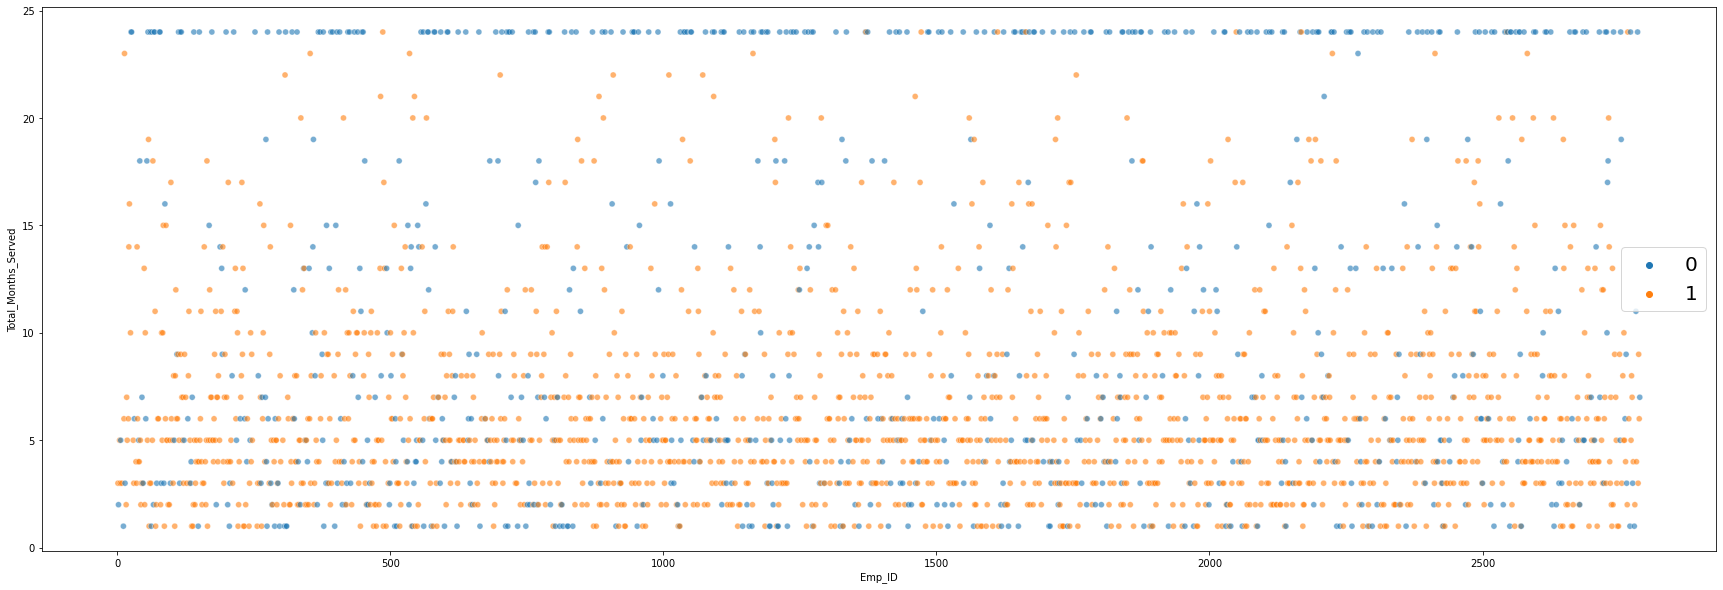

In [158]:
# Scatterplot of 'Emp_ID' and 'Total_Months_Served' with 'employee_resigned_status' as color
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train, x='Emp_ID', y='Total_Months_Served', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')

Based on the below visualization, the employees who have left are generating negative business value, along with less business value overall.

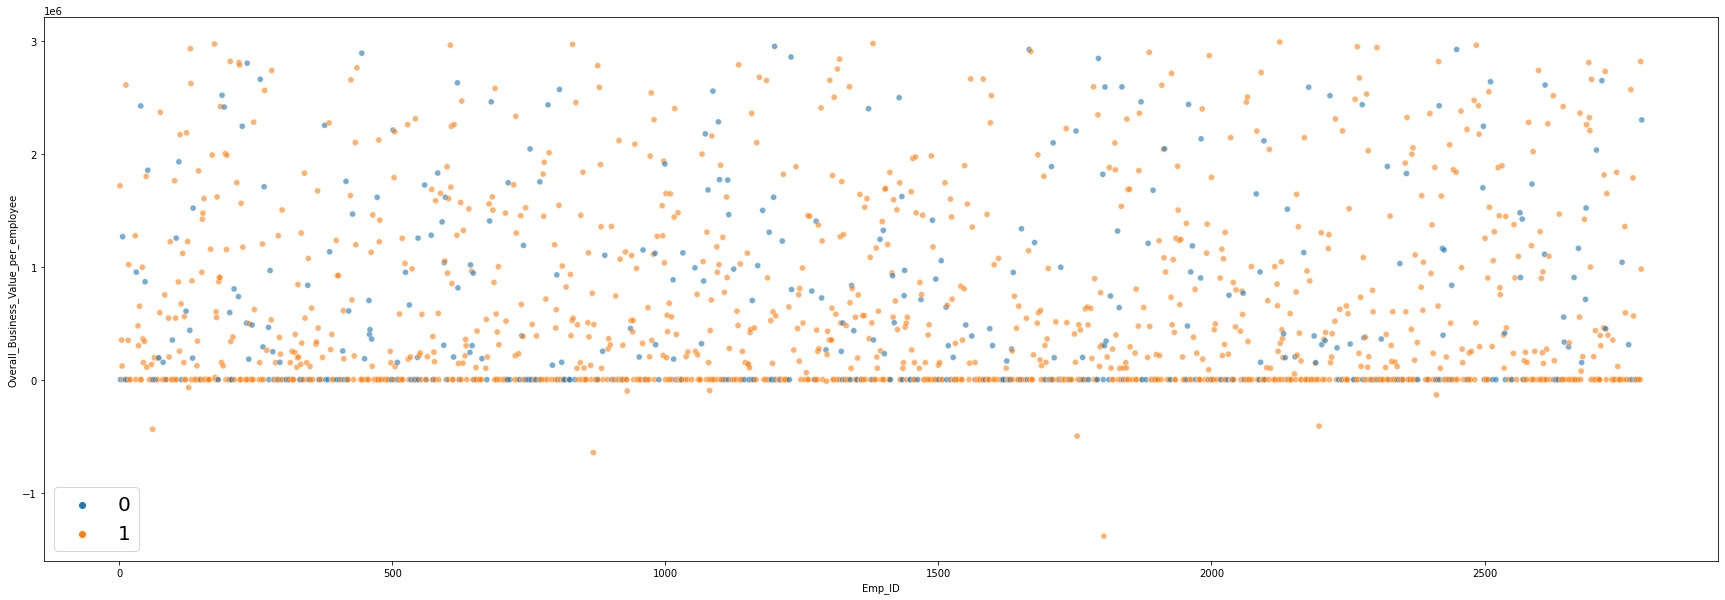

In [159]:
# Scatterplot of 'Emp_ID' and 'Overall_Business_Value_per_employee' with 'employee_resigned_status' as color
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train[train['Overall_Business_Value_per_employee']<3000000], x='Emp_ID', y='Overall_Business_Value_per_employee', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')

The boxplot below is another representation of the above graph. Here, it is more evident that the employees who left, generated less business value than those are still serving.

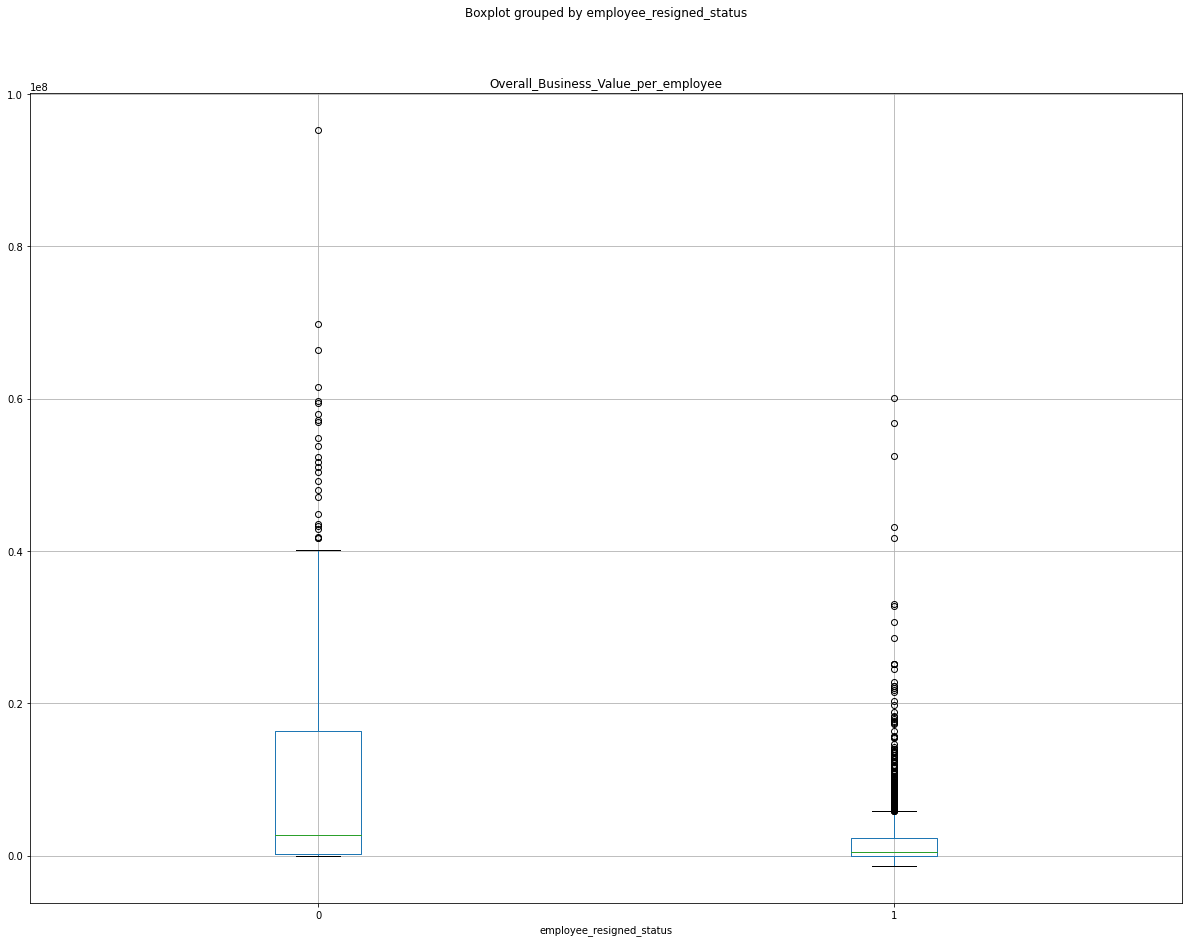

In [160]:
# Boxplot of 'Overall_Business_Value_per_employee' with 'employee_resigned_status'

train.boxplot('Overall_Business_Value_per_employee',by='employee_resigned_status',figsize=(20,15))


Based on the below visualization, the employees who have left have received very less average rating for the last 3 months, as compared to the employees who are still serving in the company.

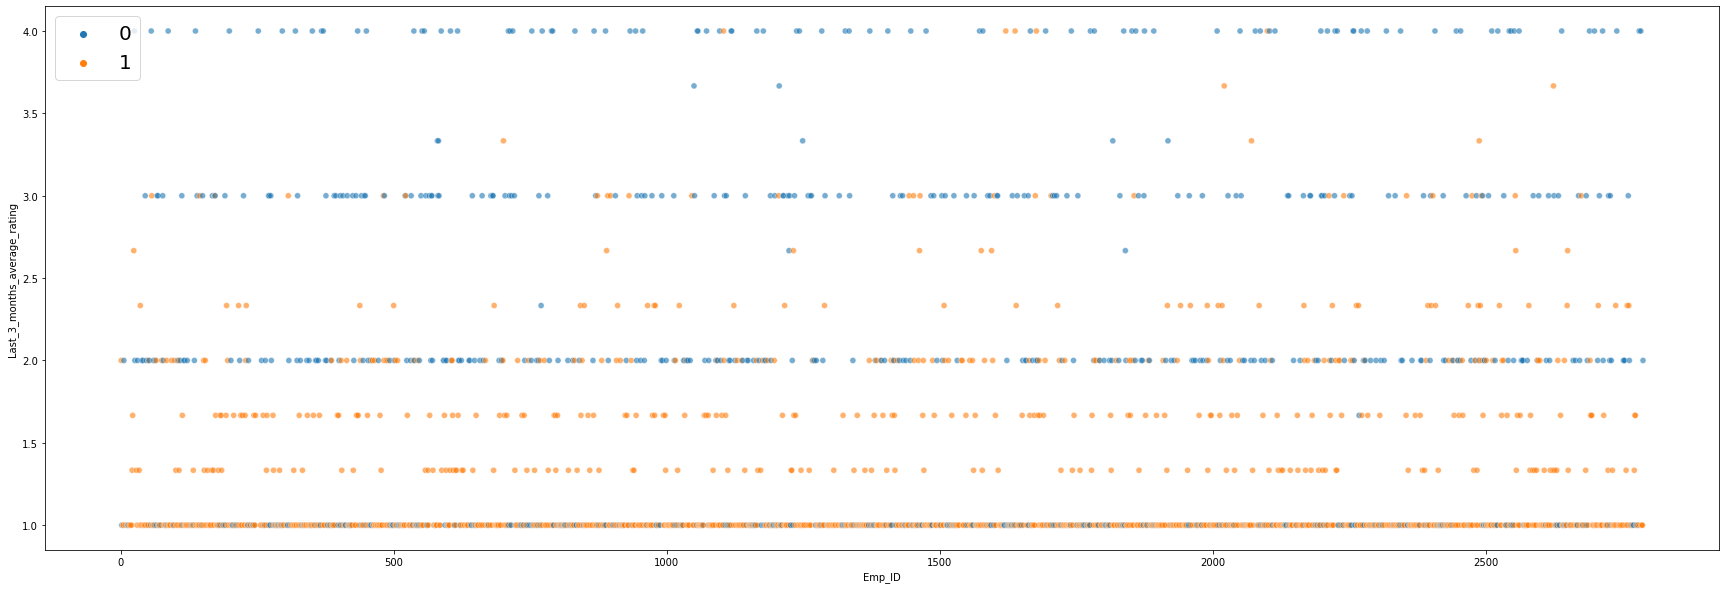

In [161]:
# Scatterplot of 'Emp_ID' and 'Last_3_months_average_rating' with 'employee_resigned_status' as color
# 0 -> not left, 1 -> left

plt.figure(figsize=(30,10))
sns.scatterplot(data=train, x='Emp_ID', y='Last_3_months_average_rating', hue='employee_resigned_status', alpha=0.6)
plt.legend(fontsize='20', title_fontsize='20')


In the train data, there are almost double the employees who have left the company, as opposed to the ones who are still serving.

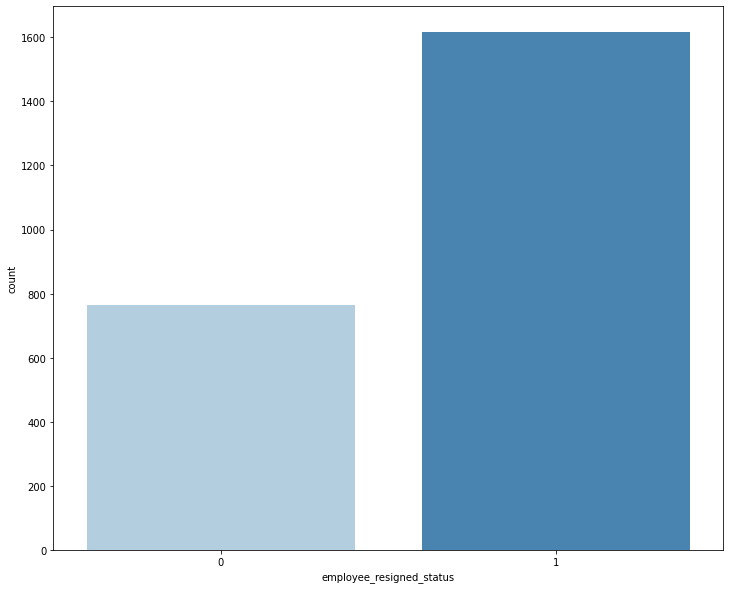

In [162]:
# Checking distribution of target variable

plt.figure(figsize = (12,10))
sns.countplot(x= train['employee_resigned_status'], palette = 'Blues')
plt.show()


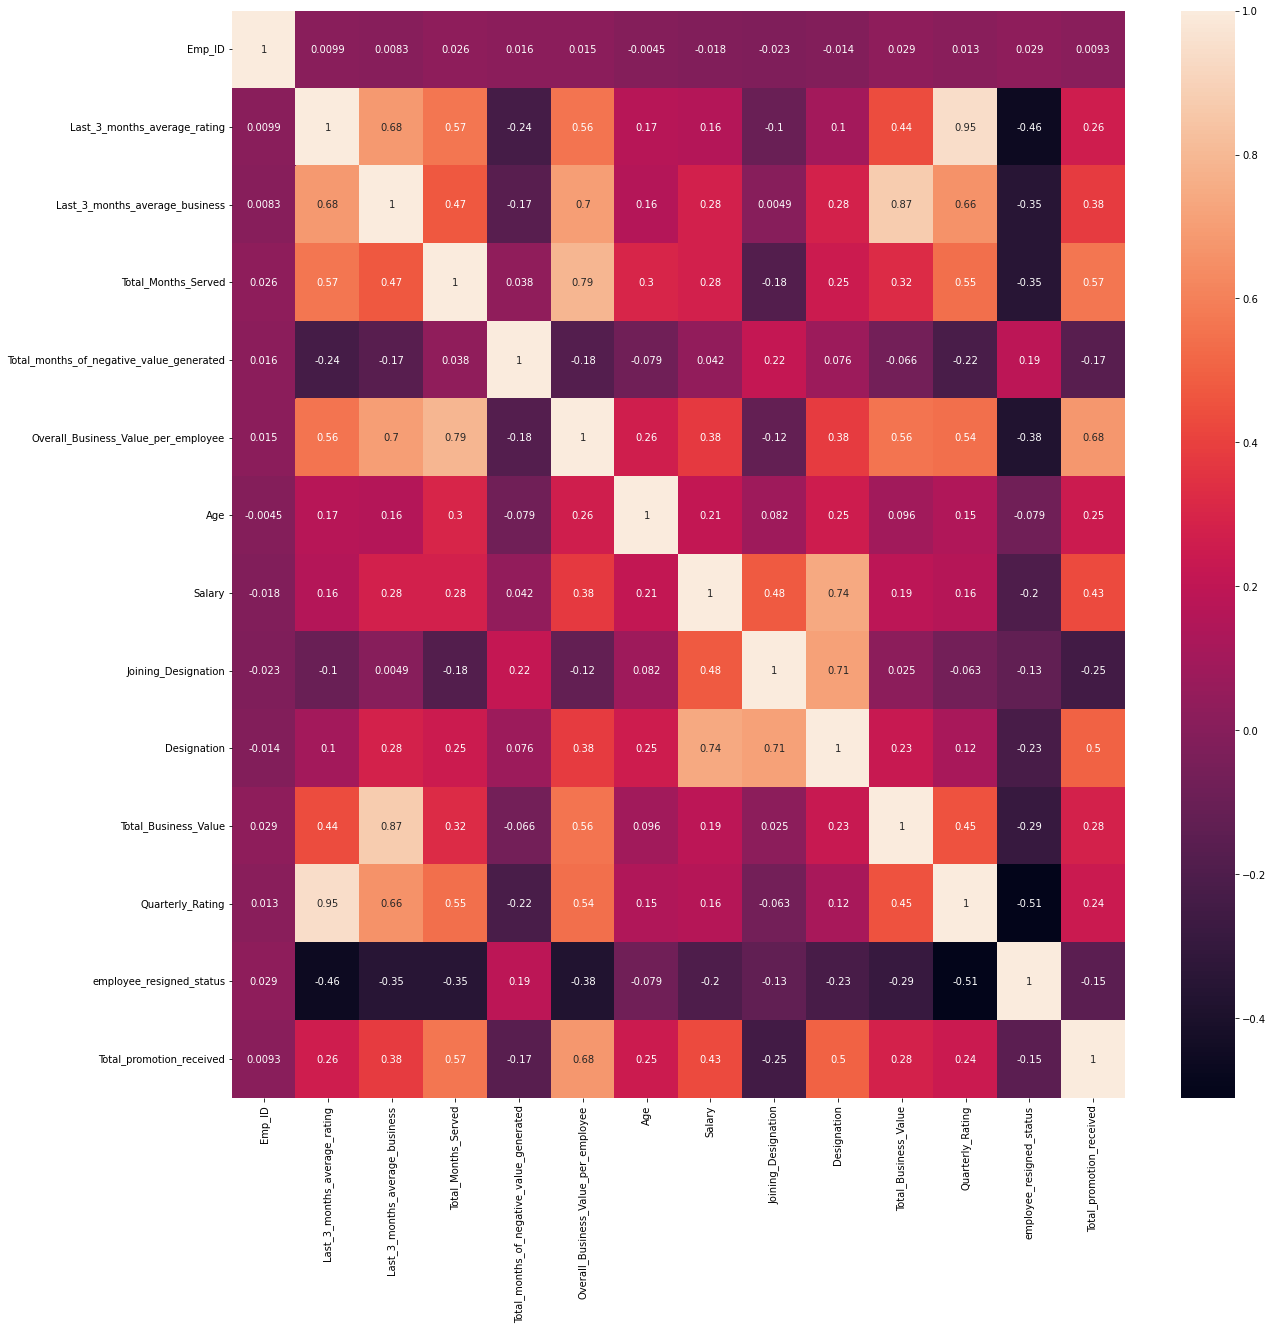

In [163]:
# Getting correlation between features

plt.figure(figsize = (20,20))
sns.heatmap(train.corr(), annot=True)

# Model Preparation

In [173]:
# Dropping unnecessary columns from dataset

train.drop(['Emp_ID','MMM-YY','Dateofjoining','LastWorkingDate','Joining_Designation','Designation','Total_Business_Value','Quarterly_Rating'], axis=1, inplace=True)

In [174]:
# Performing one hot encoding for categorical columns

train = pd.get_dummies(data=train, columns=['Gender', 'City', 'Education_Level'])


In [175]:
train.head()

,Last_3_months_average_rating,Last_3_months_average_business,Total_Months_Served,Total_months_of_negative_value_generated,Overall_Business_Value_per_employee,Age,Salary,employee_resigned_status,Total_promotion_received,Gender_Female,Gender_Male,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,2.0,571860.000000,3,2,1715580,28,57387,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,0.000000,2,2,0,31,67016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.0,116666.666667,5,4,350000,43,65603,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,40120.000000,3,2,120360,29,46368,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,2.0,421666.666667,5,4,1265000,31,78728,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [176]:
# Splitting data into training and test

# Select Features
feature = train.drop('employee_resigned_status', axis=1)

# Select Target
target = train['employee_resigned_status']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.3, 
                                                    random_state=0)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1666, 42)
Shape of testing feature: (715, 42)
Shape of training label: (1666,)
Shape of training label: (715,)


In [177]:
# Defining model evaluation function

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## KNN

In [178]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [179]:
# Evaluate Model - KNN
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7538461538461538
Precision: 0.7779850746268657
Recall: 0.879746835443038
F1 Score: 0.8257425742574257
Cohens Kappa Score: 0.412023063049593
Area Under Curve: 0.7472162403487579
Confusion Matrix:
 [[122 119]
 [ 57 417]]


## Decision Tree

In [180]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [181]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.7818181818181819
Precision: 0.83125
Recall: 0.8417721518987342
F1 Score: 0.8364779874213837
Cohens Kappa Score: 0.5087858369665741
Area Under Curve: 0.7528362834182468
Confusion Matrix:
 [[160  81]
 [ 75 399]]


## Naive Bayes

In [182]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [183]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.7734265734265734
Precision: 0.7680412371134021
Recall: 0.9430379746835443
F1 Score: 0.8465909090909092
Cohens Kappa Score: 0.4302620705937906
Area Under Curve: 0.76996340844232
Confusion Matrix:
 [[106 135]
 [ 27 447]]


## XG Boost

In [184]:
from xgboost import XGBClassifier

# fit model To training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [185]:
# Evaluate Model
xgb_eval = evaluate_model(xgb, X_test, y_test)

# Print result
print('Accuracy:',xgb_eval['acc'])
print('Precision:',xgb_eval['prec'])
print('Recall:',xgb_eval['rec'])
print('F1 Score:',xgb_eval['f1'])
print('Cohens Kappa Score:',xgb_eval['kappa'])
print('Area Under Curve:',xgb_eval['auc'])
print('Confusion Matrix:\n',xgb_eval['cm'])

Accuracy: 0.8293706293706293
Precision: 0.8271375464684015
Recall: 0.9388185654008439
F1 Score: 0.8794466403162055
Cohens Kappa Score: 0.5915357096031018
Area Under Curve: 0.8780879598018103
Confusion Matrix:
 [[148  93]
 [ 29 445]]


## Extra Tree Classifier

In [186]:
from sklearn.ensemble import ExtraTreesClassifier

# fit model no training data
treeclf = ExtraTreesClassifier(n_estimators=100)
treeclf.fit(X_train, y_train)

ExtraTreesClassifier()

In [187]:
# Evaluate Model
treeclf_eval = evaluate_model(treeclf, X_test, y_test)

# Print result
print('Accuracy:',treeclf_eval['acc'])
print('Precision:',treeclf_eval['prec'])
print('Recall:',treeclf_eval['rec'])
print('F1 Score:',treeclf_eval['f1'])
print('Cohens Kappa Score:',treeclf_eval['kappa'])
print('Area Under Curve:',treeclf_eval['auc'])
print('Confusion Matrix:\n',treeclf_eval['cm'])

Accuracy: 0.8265734265734266
Precision: 0.8264925373134329
Recall: 0.9345991561181435
F1 Score: 0.8772277227722772
Cohens Kappa Score: 0.5857435216940314
Area Under Curve: 0.8429189208116673
Confusion Matrix:
 [[148  93]
 [ 31 443]]


## Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [189]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.827972027972028
Precision: 0.8342857142857143
Recall: 0.9240506329113924
F1 Score: 0.876876876876877
Cohens Kappa Score: 0.5939469492347116
Area Under Curve: 0.8726036031304165
Confusion Matrix:
 [[154  87]
 [ 36 438]]


## CatBoost

In [190]:
# Installing cat boost

!pip3 install catboost

In [191]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=5)
clf.fit(X_train, y_train)


Learning rate set to 0.5
0:	learn: 0.4944874	total: 5.72ms	remaining: 22.9ms
1:	learn: 0.4353918	total: 7.66ms	remaining: 11.5ms
2:	learn: 0.4073223	total: 9.74ms	remaining: 6.49ms
3:	learn: 0.3969926	total: 11.6ms	remaining: 2.89ms
4:	learn: 0.3788422	total: 13.4ms	remaining: 0us


In [192]:
# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])


Accuracy: 0.8223776223776224
Precision: 0.8171846435100548
Recall: 0.9430379746835443
F1 Score: 0.8756121449559255
Cohens Kappa Score: 0.5705786937420493
Area Under Curve: 0.8525657860181733
Confusion Matrix:
 [[141 100]
 [ 27 447]]


## LightGBM

In [193]:
# Building LightGBM model 

import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [194]:
# Evaluate Model
lgbm_eval = evaluate_model(lgbm, X_test, y_test)

# Print result
print('Accuracy:', lgbm_eval['acc'])
print('Precision:', lgbm_eval['prec'])
print('Recall:', lgbm_eval['rec'])
print('F1 Score:', lgbm_eval['f1'])
print('Cohens Kappa Score:', lgbm_eval['kappa'])
print('Area Under Curve:', lgbm_eval['auc'])
print('Confusion Matrix:\n', lgbm_eval['cm'])


Accuracy: 0.806993006993007
Precision: 0.8243243243243243
Recall: 0.9008438818565401
F1 Score: 0.8608870967741935
Cohens Kappa Score: 0.5478333394434872
Area Under Curve: 0.8718945322758549
Confusion Matrix:
 [[150  91]
 [ 47 427]]


## AdaBoost

In [195]:
from sklearn.ensemble import AdaBoostClassifier

# Building AdaBoost model 
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [196]:
# Evaluate Model
ada_eval = evaluate_model(ada, X_test, y_test)

# Print result
print('Accuracy:', ada_eval['acc'])
print('Precision:', ada_eval['prec'])
print('Recall:', ada_eval['rec'])
print('F1 Score:', ada_eval['f1'])
print('Cohens Kappa Score:', ada_eval['kappa'])
print('Area Under Curve:', ada_eval['auc'])
print('Confusion Matrix:\n', ada_eval['cm'])


Accuracy: 0.8293706293706293
Precision: 0.8333333333333334
Recall: 0.9282700421940928
F1 Score: 0.878243512974052
Cohens Kappa Score: 0.5959441557118108
Area Under Curve: 0.8648869863613284
Confusion Matrix:
 [[153  88]
 [ 34 440]]


# Evaluating all models

After evaluating all models, the top 2 models seem to be Random Forest and XGBoost. Hence we will be analyzing them further.

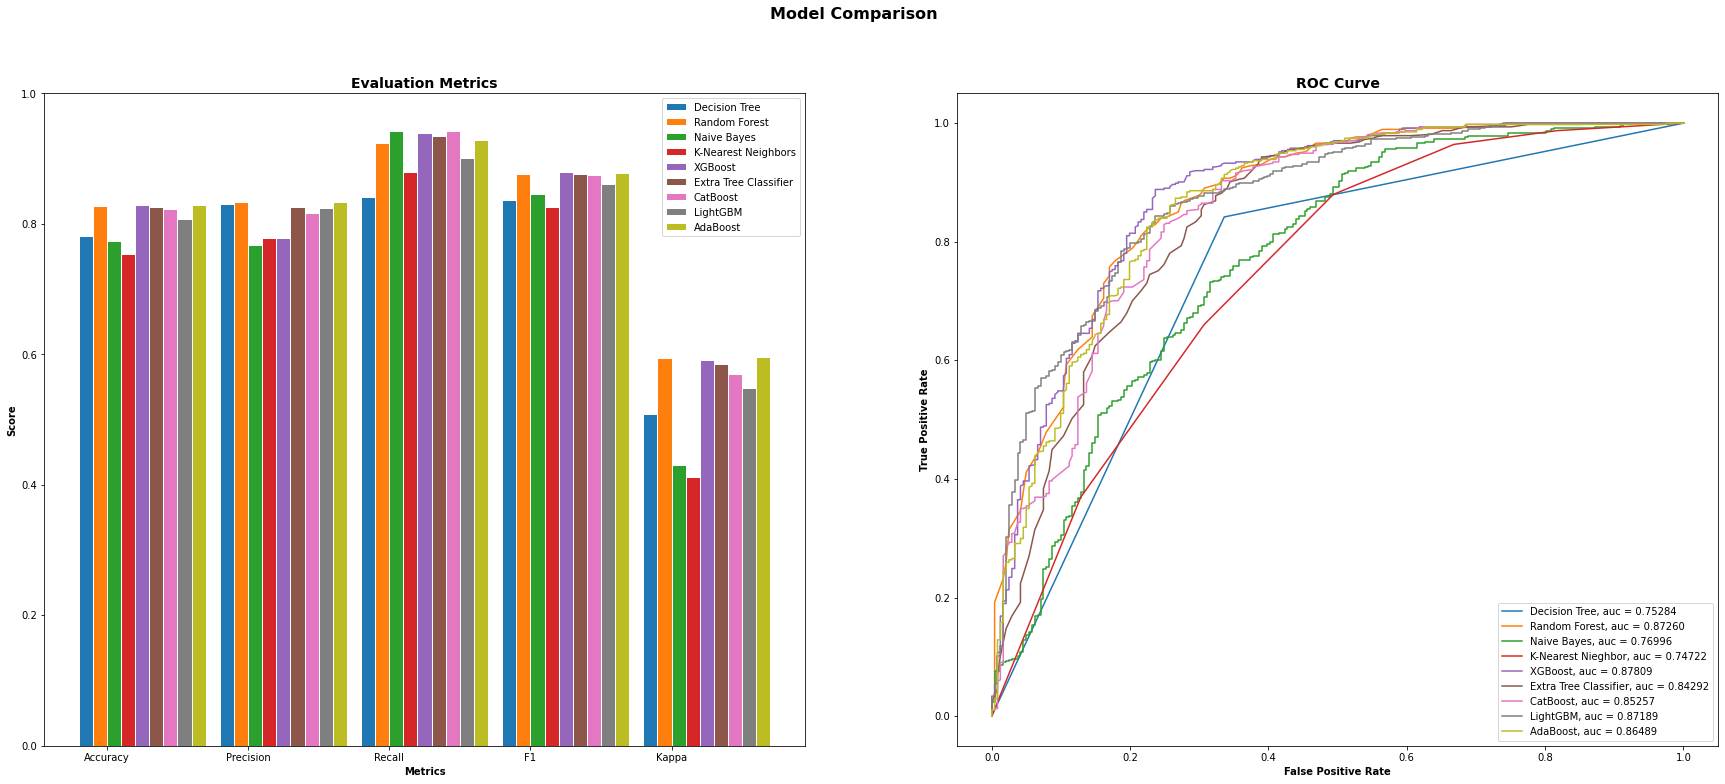

In [197]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(12)
fig.set_figwidth(30)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
xgb_score = [xgb_eval['acc'], knn_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]
treeclf_score = [treeclf_eval['acc'], treeclf_eval['prec'], treeclf_eval['rec'], treeclf_eval['f1'], treeclf_eval['kappa']]
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
lgbm_score = [lgbm_eval['acc'], lgbm_eval['prec'], lgbm_eval['rec'], lgbm_eval['f1'], lgbm_eval['kappa']]
ada_score = [ada_eval['acc'], ada_eval['prec'], ada_eval['rec'], ada_eval['f1'], ada_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r1+0.1, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r1+0.2, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r1+0.3, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r1+0.4, xgb_score, width=barWidth, edgecolor='white', label='XGBoost')
ax1.bar(r1+0.5, treeclf_score, width=barWidth, edgecolor='white', label='Extra Tree Classifier')
ax1.bar(r1+0.6, clf_score, width=barWidth, edgecolor='white', label='CatBoost')
ax1.bar(r1+0.7, lgbm_score, width=barWidth, edgecolor='white', label='LightGBM')
ax1.bar(r1+0.8, ada_score, width=barWidth, edgecolor='white', label='AdaBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGBoost, auc = {:0.5f}'.format(xgb_eval['auc']))
ax2.plot(treeclf_eval['fpr'], treeclf_eval['tpr'], label='Extra Tree Classifier, auc = {:0.5f}'.format(treeclf_eval['auc']))
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='CatBoost, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(lgbm_eval['fpr'], lgbm_eval['tpr'], label='LightGBM, auc = {:0.5f}'.format(lgbm_eval['auc']))
ax2.plot(ada_eval['fpr'], ada_eval['tpr'], label='AdaBoost, auc = {:0.5f}'.format(ada_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Performing Hypothesis Testing on performance for best 2 models

In this step, we will conduct a comparison between 5 different algorithms based on performance accuracy score. Then we will select the two models with the highest score to conduct hypothesis testing between them.

In [198]:
# Spot-Check Algorithms

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DSC', tree.DecisionTreeClassifier(random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('ET', ExtraTreesClassifier(n_estimators=100)))
models.append(('RF', RandomForestClassifier(random_state=101)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.74 (0.029)
DSC: 0.76 (0.029)
NB: 0.77 (0.026)
XGB: 0.83 (0.026)
ET: 0.80 (0.025)
RF: 0.83 (0.023)


As Random Forest and XG Boost have same mean and slightly varying standard deviation, we will be choosing them for conducting hypothesis testing

## Steps to conduct Hypothesis Testing

H0: Both models have the same performance on the dataset.

H1: Both models doesn’t have the same performance on the dataset.

Significance level is 0.05

Note: let’s assume a significance threshold of α=0.05 for rejecting the null hypothesis that both algorithms perform equally well on the dataset and conduct the 5x2_cv _t_test.

XGBClassifier Mean Accuracy: 82.9% +/-(0.026)
RandomForestClassifier Mean Accuracy: 82.5% +/-(0.023)


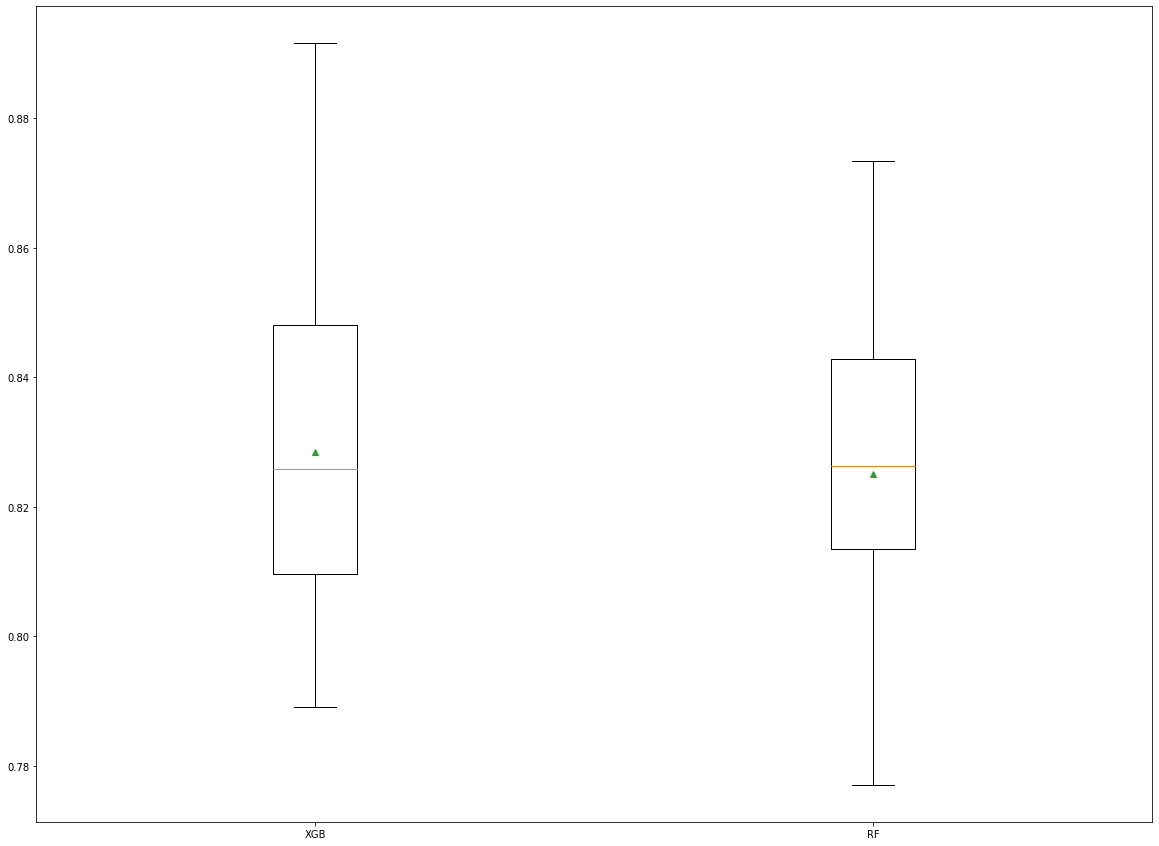

In [199]:
# Importing libraries for calculating statistics

from statistics import mean
from statistics import stdev

# evaluating model 1 - Naive Bayes

model1 = XGBClassifier()
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores1 = cross_val_score(model1, X_train, y_train, scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('XGBClassifier Mean Accuracy: %.1f%% +/-(%.3f)' % (mean(scores1*100), np.std(scores1)))

# evaluating model 2 - Random Forest

model2 = RandomForestClassifier()
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores2 = cross_val_score(model2, X_train, y_train, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('RandomForestClassifier Mean Accuracy: %.1f%% +/-(%.3f)' % (mean(scores2*100), np.std(scores2)))

# Plotting the results

plt.figure(figsize=(20,15))
plt.boxplot([scores1, scores2], labels=['XGB', 'RF'], showmeans=True)
plt.show()


Next, we will use the paired_ttest_5x2cv function from the evaluation module of the MLxtend package to calculate the t and p value for both models.

In [200]:
from mlxtend.evaluate import paired_ttest_5x2cv

# Check if difference between algorithms is statistically significant

t, p = paired_ttest_5x2cv(estimator1=model1, 
                          estimator2=model2, 
                          X=X_train, 
                          y=y_train, 
                          scoring='accuracy', 
                          random_seed=1)

# Summarize

print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')

# Interpret the results
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')


The P-value is = 0.737
The t-statistics is = -0.355
Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.


Since the difference between the 2 models is not stastically significant, we will try to optimize the performance of both the algorithms.

# Optimizing Best 2 models

Based on optiming Random Forest and XG Boost algorithms below, XG Boost gives us a higher accuracy level. So, we will be choosing this algorithm to conclude our model selection.

## Model Optimization - XGBoost

First we will run the model without any hyperparameter tuning

In [201]:
# Running the model without any hyperparameter tuning to check the RMSE

import xgboost as xgb
from sklearn.metrics import mean_squared_error

dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params={'objective':'reg:squarederror'}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())


RMSE: 0.36


Without any tuning, we’ve got a RMSE of 0.36. Which is great, but let’s see how it would perform with just a few tuned hyperparameters.

In [202]:
dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 0.35


With just a little bit of tuning, we’ve now got a RMSE of 0.35. It’s a 2.7% improvement! Lets see if we can improve this further.

We will try with Grid Search - which is an exhaustive search over every combination of specified parameter values.

In [203]:
# Using Grid Search CV 

from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[08:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:28] WARNING: /workspace/src/objective/regr

The RMSE through GridSearch comes out to be 0.357. Let us use these parameters to run our model again.

In [204]:
# Applying these parameters to train the model again

# fit model no training data
xgb_tuned = XGBClassifier(colsample_bytree = 0.7, learning_rate = 0.01, max_depth = 6, n_estimators = 500)
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=6,
              n_estimators=500)

In [205]:
# Evaluate Model after hyperparameter tuning using Grid Search 

xgb_eval = evaluate_model(xgb_tuned, X_test, y_test)

# Print result
print('Accuracy:',xgb_eval['acc'])
print('Precision:',xgb_eval['prec'])
print('Recall:',xgb_eval['rec'])
print('F1 Score:',xgb_eval['f1'])
print('Cohens Kappa Score:',xgb_eval['kappa'])
print('Area Under Curve:',xgb_eval['auc'])
print('Confusion Matrix:\n',xgb_eval['cm'])

Accuracy: 0.8335664335664336
Precision: 0.8342749529190208
Recall: 0.9345991561181435
F1 Score: 0.8815920398009951
Cohens Kappa Score: 0.6045997202433233
Area Under Curve: 0.8898313987079154
Confusion Matrix:
 [[153  88]
 [ 31 443]]


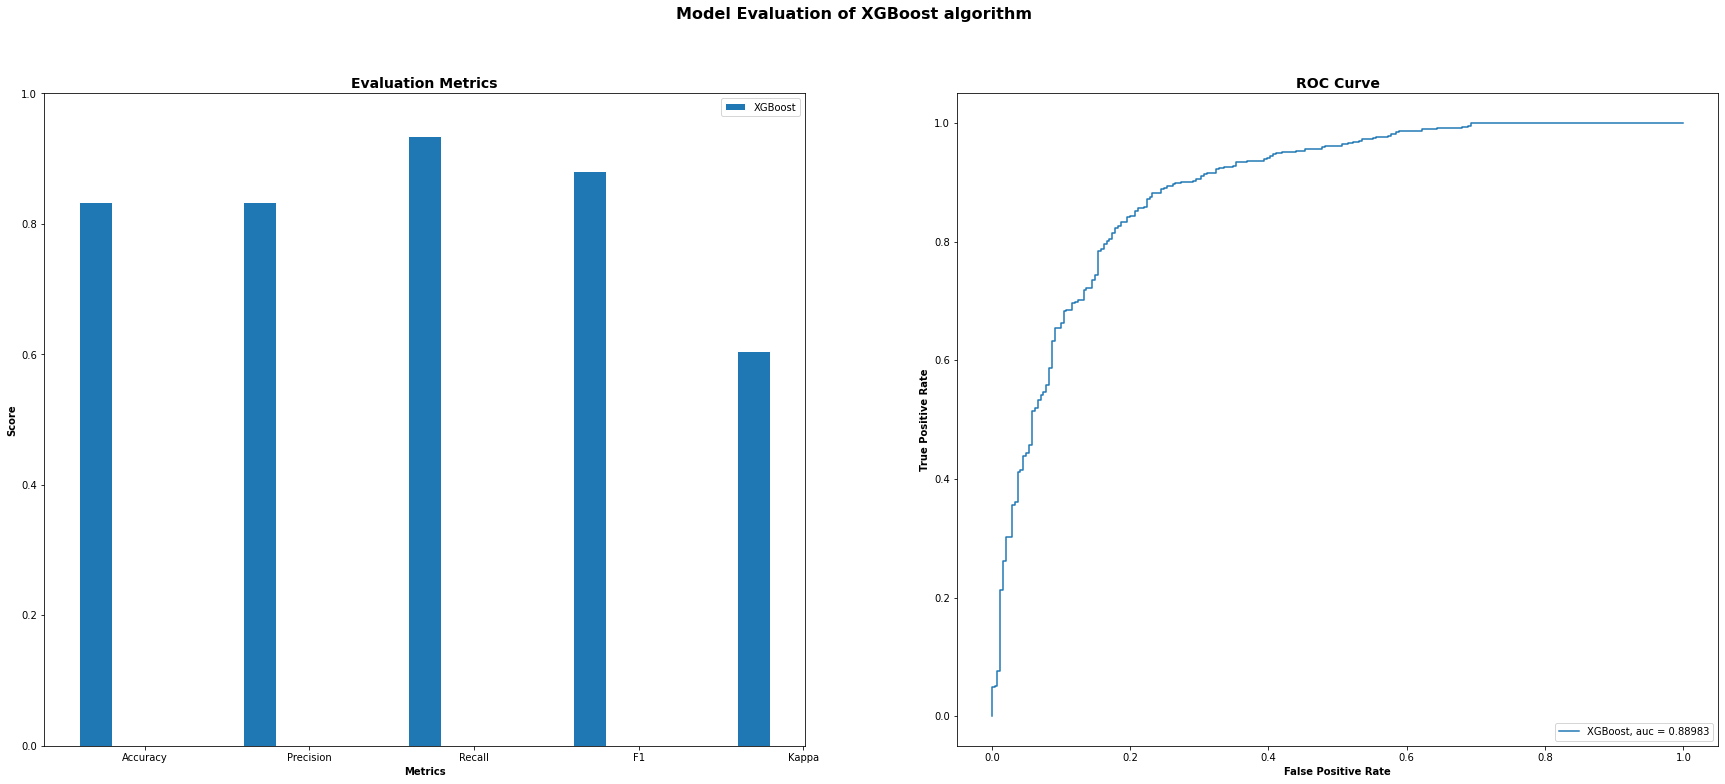

In [206]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Evaluation of XGBoost algorithm', fontsize=16, fontweight='bold')
fig.set_figheight(12)
fig.set_figwidth(30)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(xgb_score))

## Make the plot
ax1.bar(r1, xgb_score, width=barWidth, edgecolor='white', label='XGBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(xgb_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGBoost, auc = {:0.5f}'.format(xgb_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

## Model Optimization - Random Forest

In [207]:
# Optimizing Random Forest

## Random Forest Hyperparameters ###

#number of trees in random forest
n_estimators = [100,140, 180, 220, 260]

#number of features to consider at every split
max_features = [0.2, 0.4, 0.6, 0.8, 1.0]

#maximum number of levels in tree
max_depth = [10,20,30,40,50,60]

#number of samples
max_samples = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#method of selecting samples for training each tree
bootstrap = [True, False]

#minimum number of saples required to split a node
min_samples_split = [2,3,5,7,9,11,13,15,17,17]

#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,9,11,13,15,17]


In [208]:
# Create the param grid

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples,
              'bootstrap': bootstrap,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf
              }
print(param_grid)

{'n_estimators': [100, 140, 180, 220, 260], 'max_features': [0.2, 0.4, 0.6, 0.8, 1.0], 'max_depth': [10, 20, 30, 40, 50, 60], 'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 3, 5, 7, 9, 11, 13, 15, 17, 17], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 17]}


In [209]:
# With RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_tuned = RandomForestClassifier()
rf_Grid = RandomizedSearchCV(estimator = rf_tuned, param_distributions=param_grid, cv = 5, verbose = 1, n_jobs = 5)


In [210]:
# Running the model again with tuned parameters

rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60],
                                        'max_features': [0.2, 0.4, 0.6, 0.8,
                                                         1.0],
                                        'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 9, 11, 13, 15,
                                                             17],
                                        'min_samples_split': [2, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 17],
                                        'n_estimators': [100, 140, 180, 220,
                                      

In [211]:
# Displaying the best parameters

rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 0.4,
 'max_samples': 0.7,
 'min_samples_leaf': 4,
 'min_samples_split': 17,
 'n_estimators': 260}

In [212]:
# Displaying the best score

rf_Grid.best_score_

0.8199277121432809

In [213]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf_tuned = RandomForestClassifier(random_state=101, n_estimators = 100, max_depth = 50, max_features = 0.2, max_samples = 0.5, min_samples_leaf = 3, min_samples_split = 13, bootstrap=False)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features=0.2,
                       max_samples=0.5, min_samples_leaf=3,
                       min_samples_split=13, random_state=101)

In [214]:
# Evaluate Model
rf_eval = evaluate_model(rf_tuned, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8237762237762237
Precision: 0.8320610687022901
Recall: 0.919831223628692
F1 Score: 0.87374749498998
Cohens Kappa Score: 0.5844902176018596
Area Under Curve: 0.8813575642978447
Confusion Matrix:
 [[153  88]
 [ 38 436]]


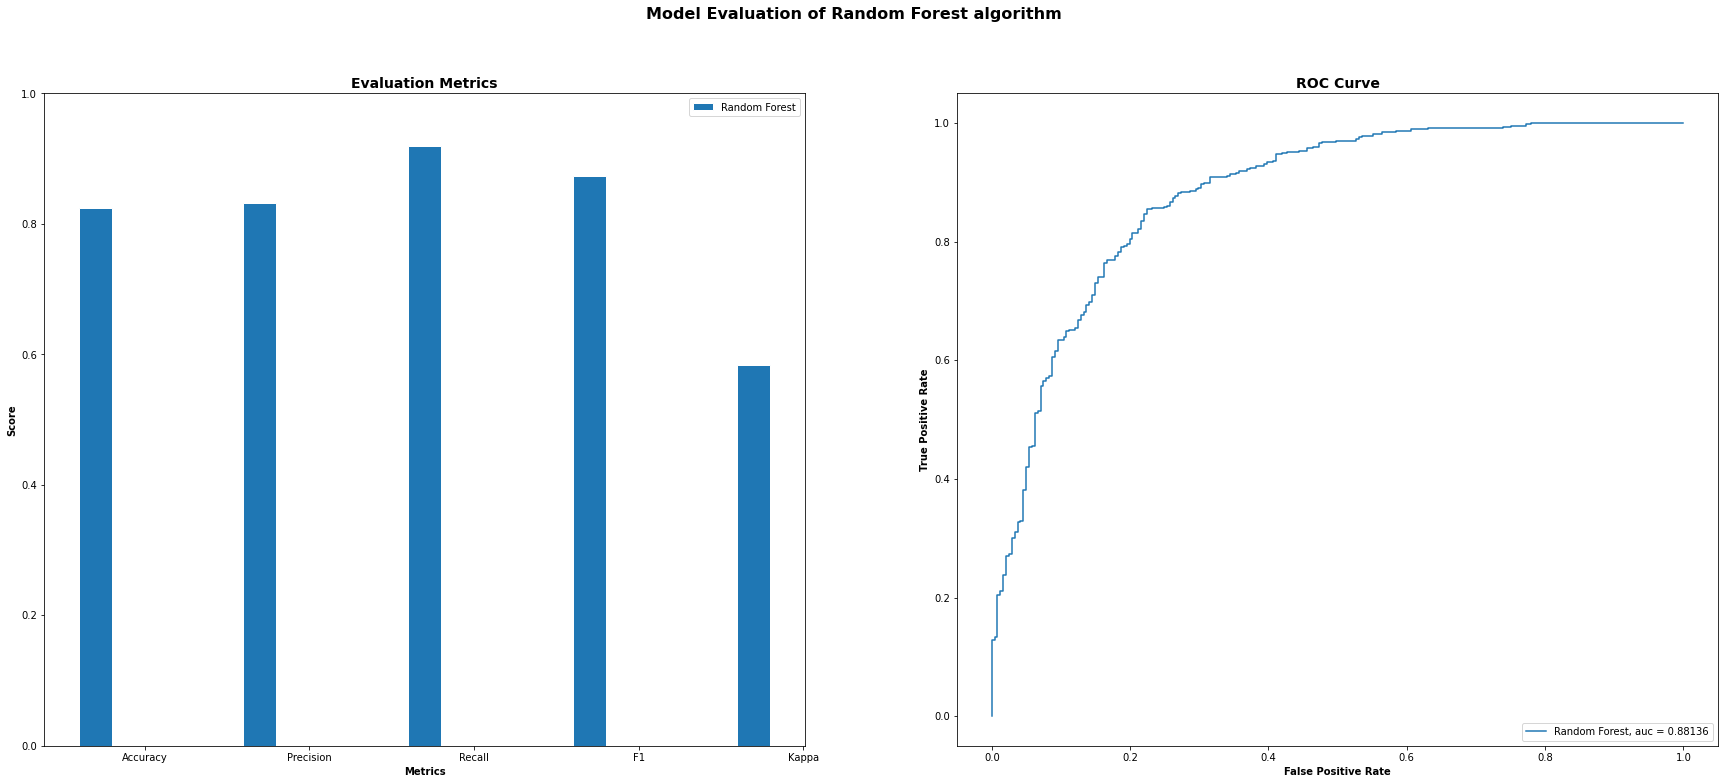

In [215]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Evaluation of Random Forest algorithm', fontsize=16, fontweight='bold')
fig.set_figheight(12)
fig.set_figwidth(30)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(rf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Interpreting final model using SHAP

We will now see how much does each feature contribute to the prediction using the SHAP Waterfall Plot

The blue bar shows how much a particular feature decreases the value of the prediction.

The red bar shows how much a particular feature increases the value of the prediction.

Negative values imply probabilities of less than 0.5 that the employee left the company

In [216]:
# Installing shap

!pip install shap

 99%|===================| 1649/1666 [00:44<00:00]       

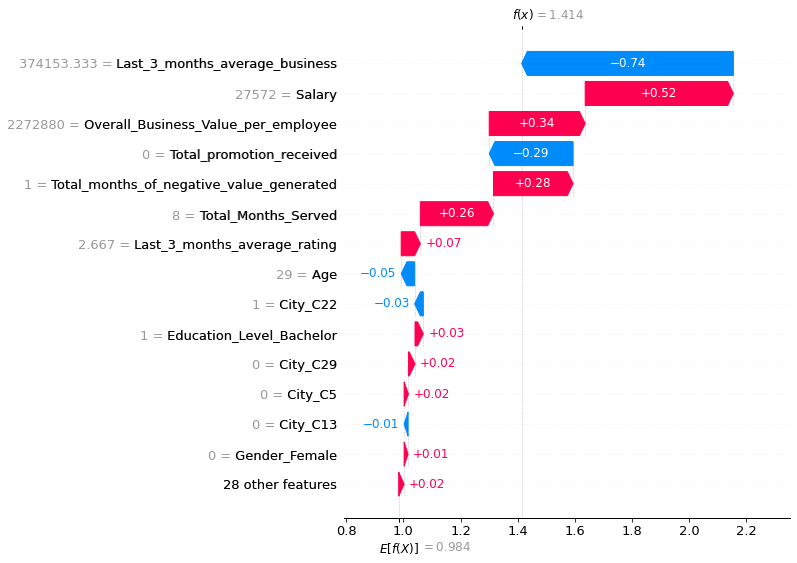

In [217]:
# Using SHAP to explain the XGB model
# Waterfall Plot depicting top 15 predictors

import shap

explainer = shap.Explainer(xgb_tuned, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0], max_display=15)

Next is the SHAP summary plot, which tells us the most important features and their range of effects over the dataset.

 96%|=================== | 1602/1666 [00:43<00:01]       

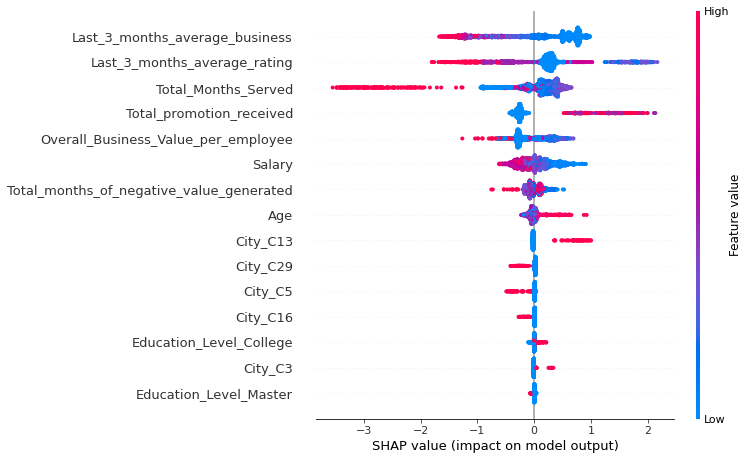

In [218]:
# Using SHAP to explain the XGB model
# Summary Plot depicting top 15 predictors

import shap

explainer = shap.Explainer(xgb_tuned, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, max_display=15)


Below are some insights obtained from the SHAP plots

1. As the **business generated by an employee increases**, they are **less likely** to leave the company.

2. As the **number of months served by an employee increases**, they are **less likely** to leave the company.

3. As the **number of promotions received by an employee increases**, they are **equally likely** to leave the company.

# Preparing submission file with predicted attrition for specific employees as given in the problem statement

In [222]:
# Predicting the Test set results

y_pred = rf.predict(X_test)
test_pred_attr = pd.DataFrame(y_pred, columns = ['pred_attr'])
test_pred_attr.value_counts()


pred_attr
1            525
0            190
dtype: int64

In [223]:
# Checking head of test results prediction

test_pred_attr.head()

,pred_attr
0,1
1,1
2,1
3,1
4,1


In [230]:
# Preparing dataset for predicting train results

train_new = train.copy()
train_new.drop  (['employee_resigned_status'], axis=1, inplace=True)

In [231]:
# Predicting the Train set results

y_train_pred = rf.predict(train_new)
train_pred_attr = pd.DataFrame(y_train_pred, columns = ['train_pred_attr'])
train_pred_attr.value_counts()


train_pred_attr
1                  1668
0                   713
dtype: int64

In [232]:
# Checking head of train results prediction

train_pred_attr.head()

,train_pred_attr
0,1
1,1
2,1
3,1
4,0


In [233]:
# Creating target column in final prediction dataframe

final_prediction['Target'] = train_pred_attr['train_pred_attr']


In [234]:
# CHecking head of final prediction 

final_prediction.head()

,Emp_ID,Target
0,1,1
1,2,1
2,4,1
3,5,1
4,6,0


Now we will finally be filtering out the desired employee Id's with their attrition prediction

In [237]:
# Creating the final dataframe with specific employee ids and generating csv file

out_df = pd.merge(test, final_prediction, on='Emp_ID',how='left')
out_df.to_csv('/content/drive/MyDrive/Submission_Predicting_Employee_Attrition.csv', index = False)
out_df.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


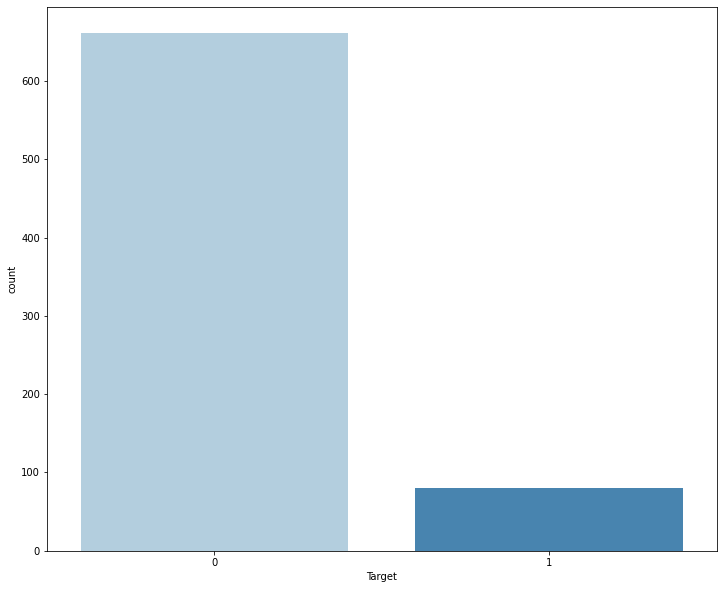

In [238]:
# Getting total counts of 0's and 1's
# 0 -> employee will not leave the company
# 1 -> employee will leave the company

plt.figure(figsize = (12,10))
sns.countplot(x= out_df['Target'], palette = 'Blues')
plt.show()